In [ ]:
%run "/Users/miguelflores/Desktop/TFM/Codigo/1. Librerias Mongo/MongoDB_Connections.ipynb"
%run "/Users/miguelflores/Desktop/TFM/Codigo/1. Librerias Mongo/MongoDB_Funciones_Consultas.ipynb"

# from ipynb.fs.full.MongoDB_Connections import _connect_mongo

# from ipynb.fs.full.MongoDB_Funciones_Consultas import _resumen_mensual_por_anio
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio_mes
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio_por_estacion
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio_mes_por_estacion

# from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_meteo_full
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_meteo_por_anio
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_meteo_por_anio_mes

# from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_stations
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_stations_EstacionesMeteo

import time
import pandas as pd
# pd.options.display.float_format = '{:,}'.format

## Conexión a Mongo

In [ ]:
db_Tracks = _connect_mongo('cloud', 'cluster0.15npsxw.mongodb.net', None, 'ucmtfm2022', 'UCM_2022', 'BiciMAD', 'Tracks_Demanda')
db_Meteo = _connect_mongo('cloud', 'cluster0.15npsxw.mongodb.net', None, 'ucmtfm2022', 'UCM_2022', 'BiciMAD', 'Meteo_NivelHora')
db_Stations = _connect_mongo('cloud', 'cluster0.15npsxw.mongodb.net', None, 'ucmtfm2022', 'UCM_2022', 'BiciMAD', 'Station_Master')
db_Stations_Meteo = _connect_mongo('cloud', 'cluster0.15npsxw.mongodb.net', None, 'ucmtfm2022', 'UCM_2022', 'BiciMAD', 'Station_EstacionMeteo')

## Descarga datos

In [ ]:
# # Tracks
#t_ini = time.time()
#data_Tracks_2017 = _data_anio(db_Tracks, 2017)
#data_Tracks_2018 = _data_anio(db_Tracks, 2018)
#data_Tracks_2019 = _data_anio(db_Tracks, 2019)
#data_Tracks_2020 = _data_anio(db_Tracks, 2020)
#data_Tracks_2021 = _data_anio(db_Tracks, 2021)
#t_end = time.time()

#print ((t_end - t_ini)/60)

#data_Tracks = pd.concat([
#     data_Tracks_2017,
#     data_Tracks_2018,
#     data_Tracks_2019,
#     data_Tracks_2020,
#     data_Tracks_2021])

#data_Tracks.shape

In [1]:
import time
import pandas as pd

t_ini = time.time()
data_Tracks = pd.read_csv('/Users/miguelflores/Desktop/TFM/DataFullTracks_MongoDB.csv')
t_end = time.time()
print (t_end - t_ini)

/Users/miguelflores/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


22.778228759765625


In [112]:
data_Tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13684833 entries, 0 to 13684832
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ANIO                  int64  
 2   MES                   int64  
 3   DIA                   int64  
 4   HORA                  int64  
 5   DIA_SEMANA            int64  
 6   AM_PM                 object 
 7   TEMPORADA             object 
 8   UNPLUG_TIME_date      object 
 9   travel_time           int64  
 10  idunplug_station      int64  
 11  idplug_station        int64  
 12  user_type             int64  
 13  ageRange              int64  
 14  zip_code              object 
 15  DEMANDA               int64  
 16  travel_time_mins      float64
 17  travel_time_mins_log  float64
 18  Tipo_Viaje            object 
 19  Tipo                  object 
dtypes: float64(2), int64(12), object(6)
memory usage: 2.0+ GB


### Missing values

In [2]:
data_Tracks.isnull().sum()

Unnamed: 0                0
ANIO                      0
MES                       0
DIA                       0
HORA                      0
DIA_SEMANA                0
AM_PM                     0
TEMPORADA                 0
UNPLUG_TIME_date          0
travel_time               0
idunplug_station          0
idplug_station            0
user_type                 0
ageRange                  0
zip_code            6305378
DEMANDA                   0
dtype: int64

### EDA: idunplug_station

In [12]:
data_inplug_station = data_Tracks[['idunplug_station','DEMANDA']]
data_inplug_station = data_inplug_station.groupby(['idunplug_station']).sum('Demanda')

<AxesSubplot:xlabel='idunplug_station'>

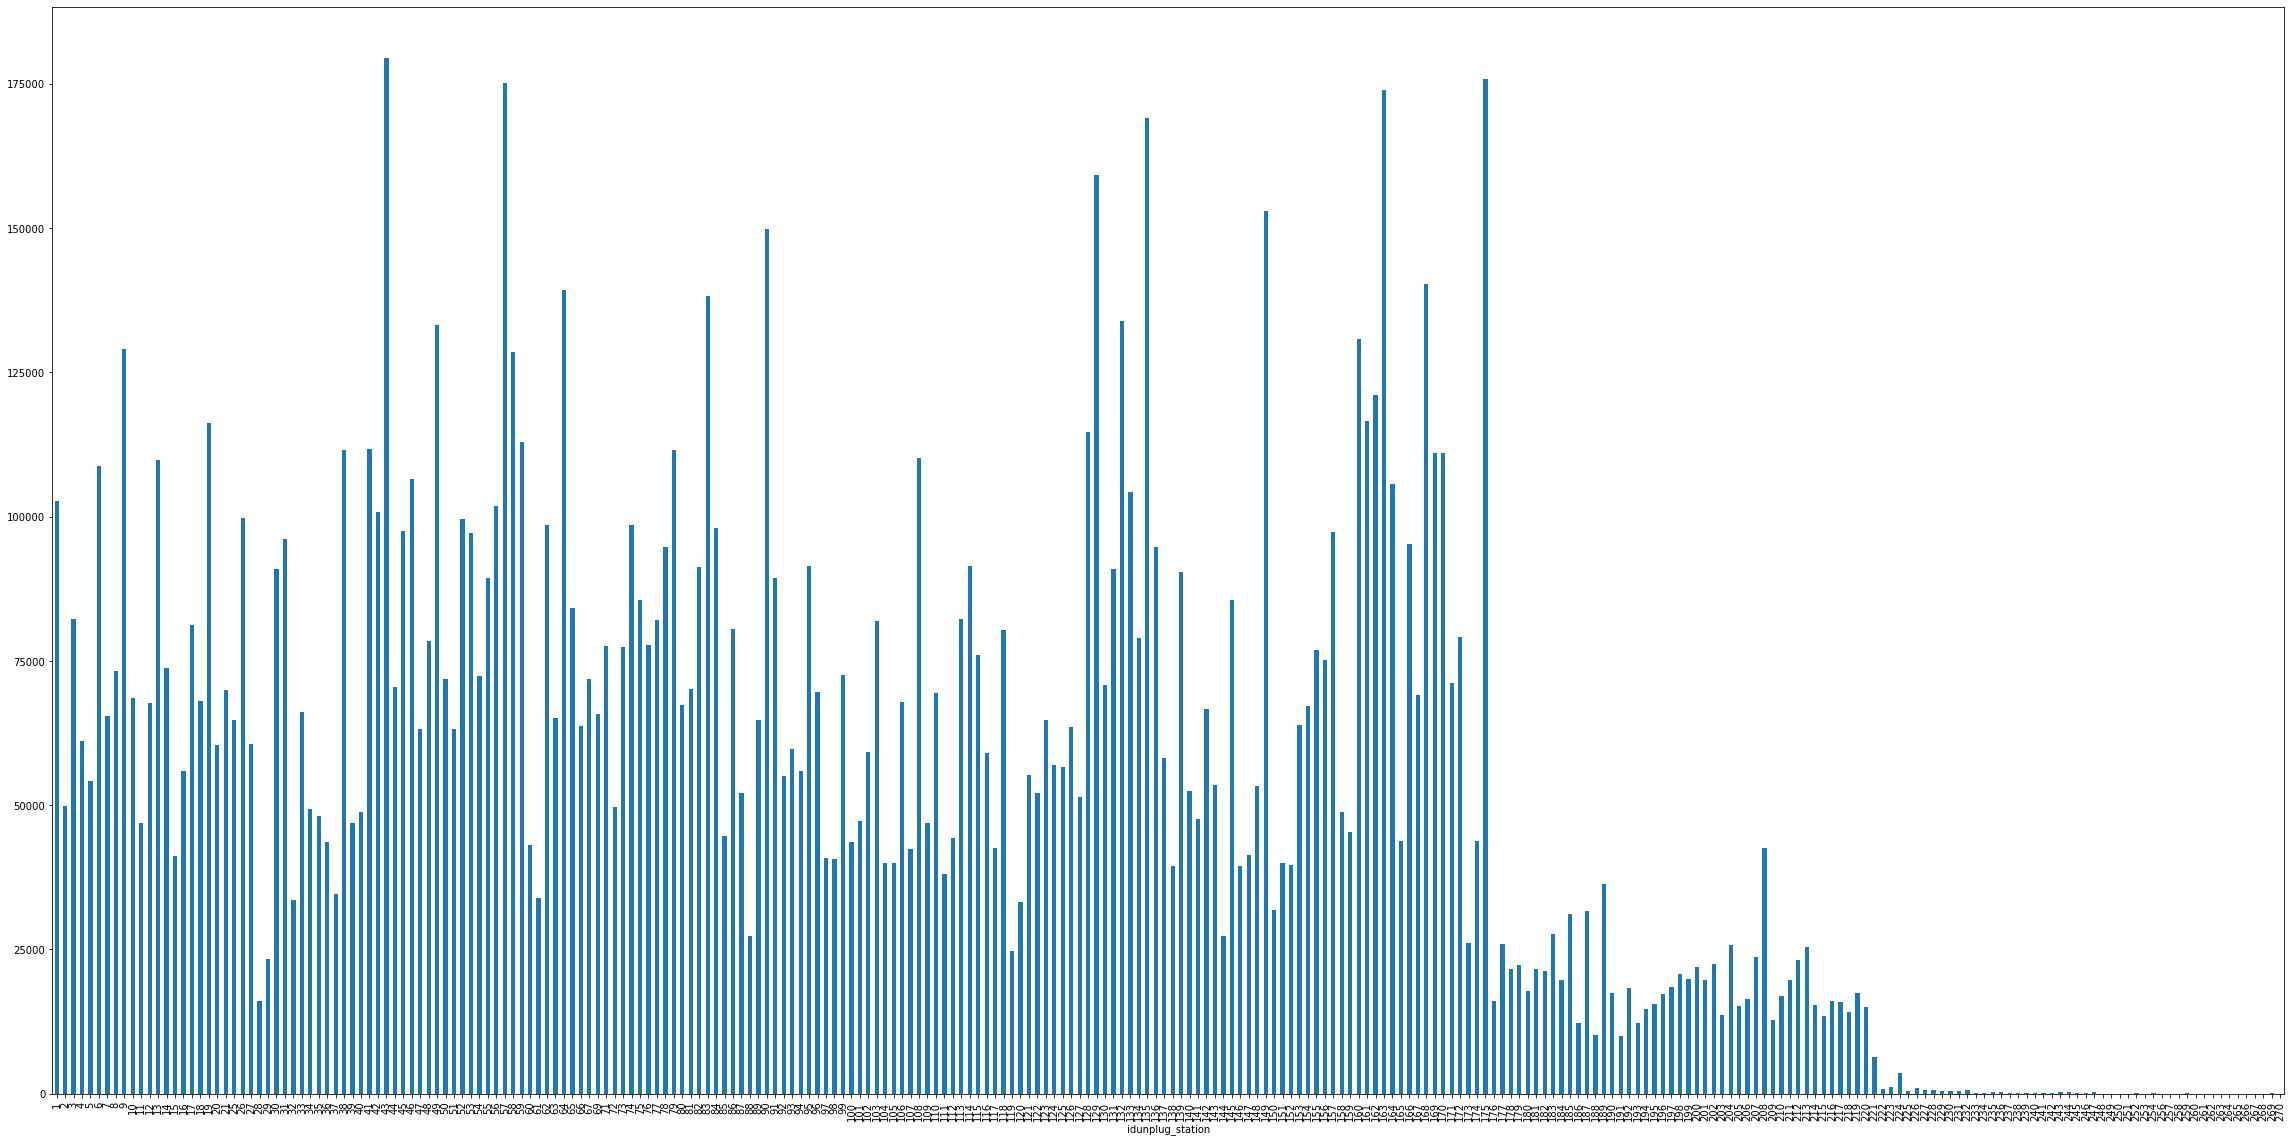

In [13]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (40, 20)

data_inplug_station['DEMANDA'].plot(kind = 'bar')

 ##### TOP 10 Estaciones con más uso

In [6]:
data_inplug_station = data_inplug_station.sort_values('DEMANDA',ascending=False)
data_inplug_station['DEMANDA'].head(10)

idunplug_station
43     179394
175    175870
57     175086
163    173879
135    169005
129    159267
149    152973
90     149818
168    140234
64     139331
Name: DEMANDA, dtype: int64

### Evolución de la demanda por mes y año

In [16]:
data_mes_anio = data_Tracks[['ANIO','MES','DEMANDA']]
data_mes_anio = data_mes_anio.groupby(['ANIO','MES']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_mes_anio = data_mes_anio.reset_index() 
data_mes_anio

,ANIO,MES,DEMANDA
0,2017,3,291
1,2017,4,245414
2,2017,5,327598
3,2017,6,372272
4,2017,7,342539
5,2017,8,289574
6,2017,9,402533
7,2017,10,398785
8,2017,11,337002
9,2017,12,254014


<AxesSubplot:xlabel='ANIO', ylabel='DEMANDA'>

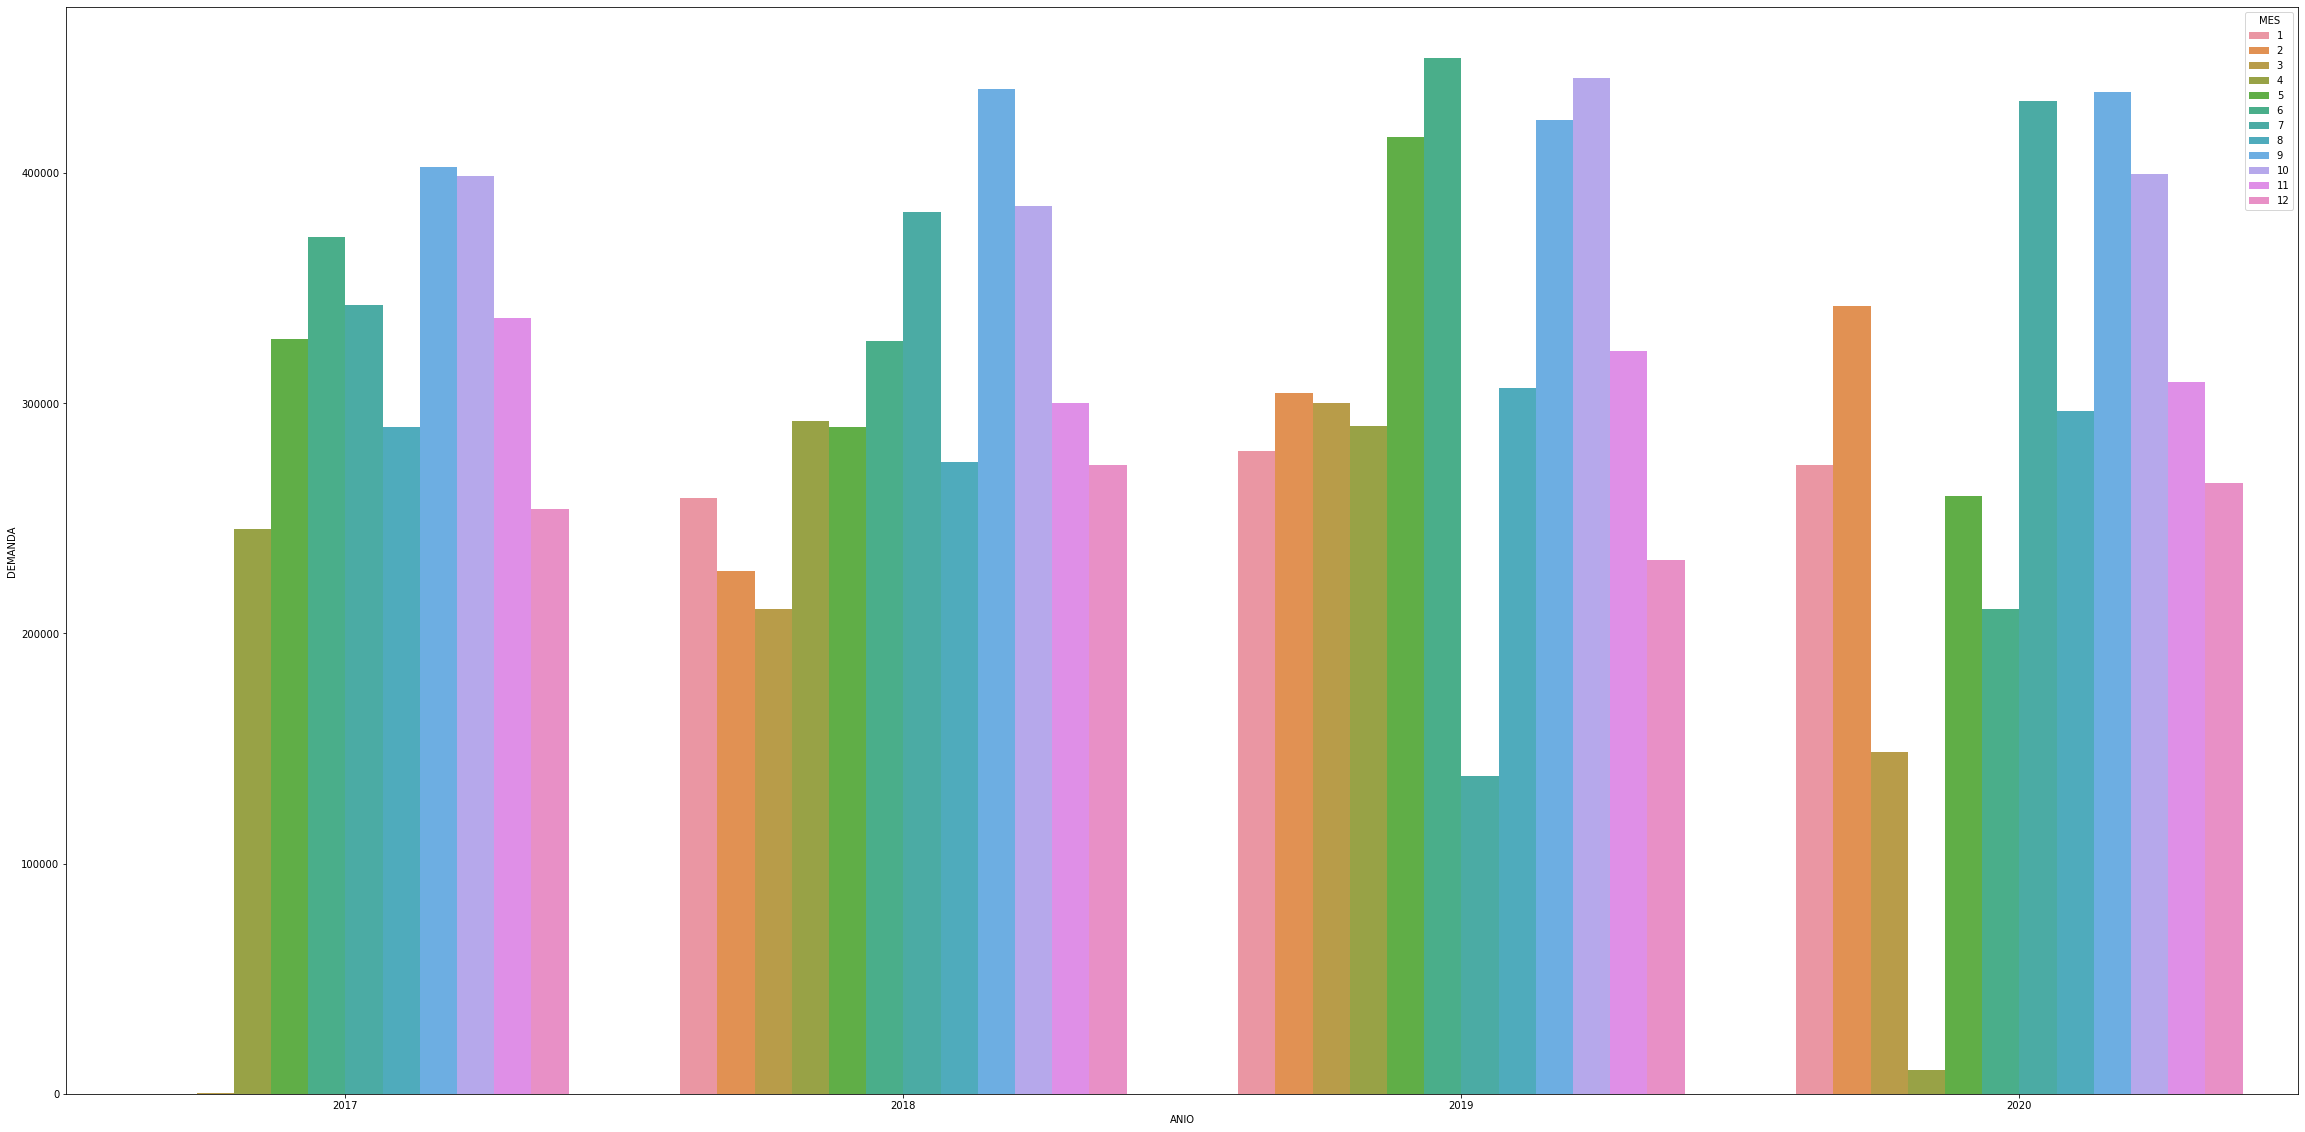

In [18]:
import seaborn as sns
sns.barplot(x="ANIO", y="DEMANDA", 
            hue="MES", data=data_mes_anio) 

## Demanda por día de la semana

<AxesSubplot:xlabel='DIA', ylabel='DEMANDA'>

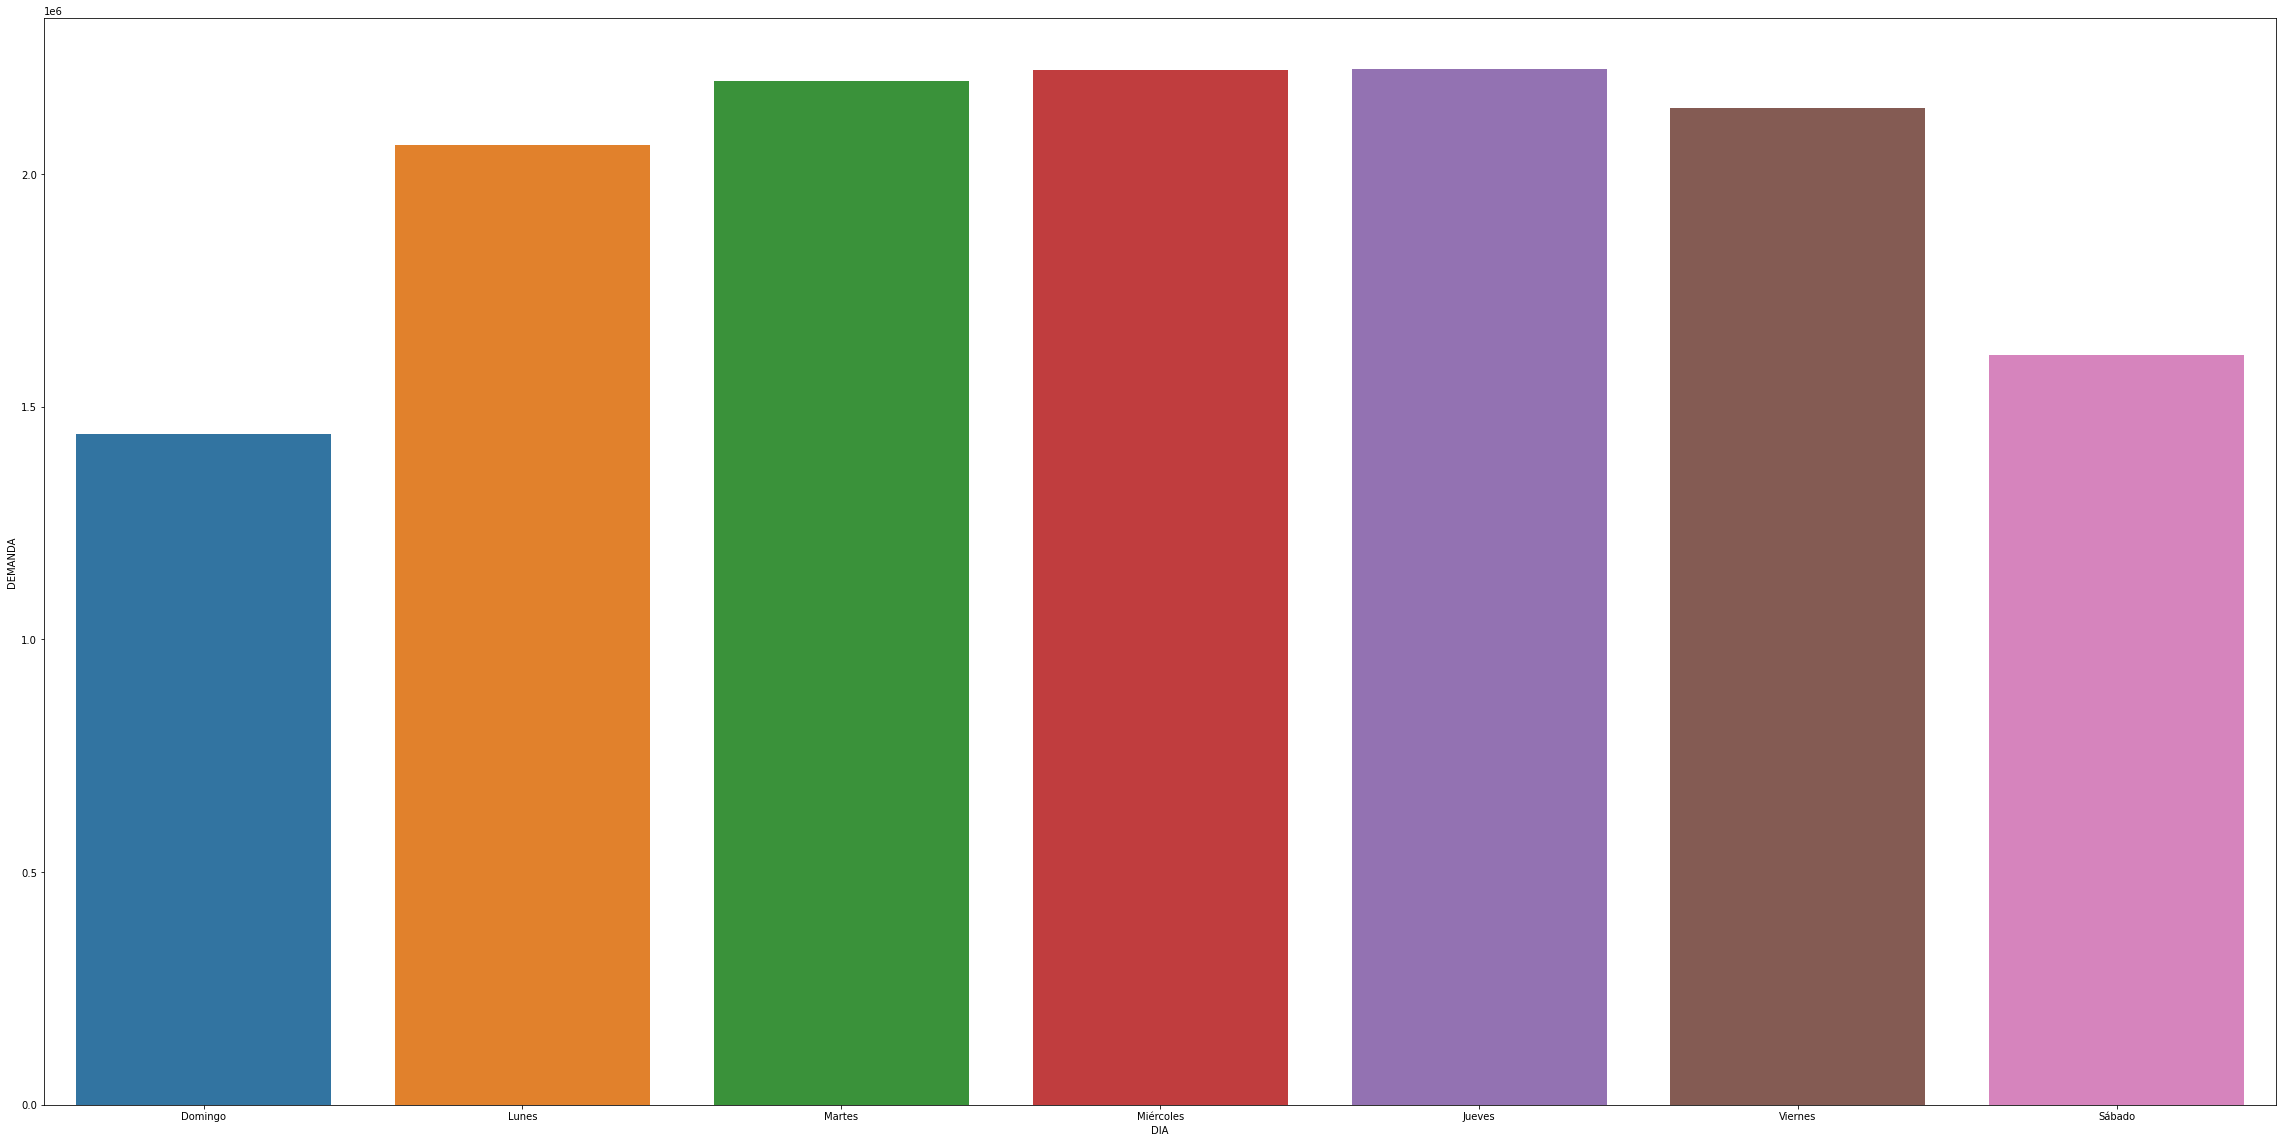

In [106]:
data_dia_sem = data_Tracks[['DIA_SEMANA','DEMANDA']]
data_dia_sem = data_dia_sem.groupby(['DIA_SEMANA']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_dia_sem = data_dia_sem.reset_index() 
conditionlist = [
    (data_dia_sem['DIA_SEMANA'] == 2),
    (data_dia_sem['DIA_SEMANA'] == 3),
    (data_dia_sem['DIA_SEMANA'] == 4),
    (data_dia_sem['DIA_SEMANA'] == 5),
    (data_dia_sem['DIA_SEMANA'] == 6),
    (data_dia_sem['DIA_SEMANA'] == 7),
    (data_dia_sem['DIA_SEMANA'] == 1)]
choicelist = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']
data_dia_sem['DIA'] = np.select(conditionlist, choicelist, default='Not Specified')
sns.barplot(x="DIA", y="DEMANDA", data=data_dia_sem) 

### EDA: travel_time

In [19]:
data_Tracks['travel_time_mins'] = data_Tracks['travel_time']/60  # Convierte a minutos

Descripción general

In [22]:
data_Tracks['travel_time_mins'].describe()

count    1.368483e+07
mean     2.147260e+01
std      4.438728e+02
min     -1.616155e+04
25%      7.733333e+00
50%      1.175000e+01
75%      1.793333e+01
max      3.212148e+05
Name: travel_time_mins, dtype: float64

#### Boxplot por día de semana

<AxesSubplot:xlabel='DIA_SEMANA', ylabel='travel_time_mins'>

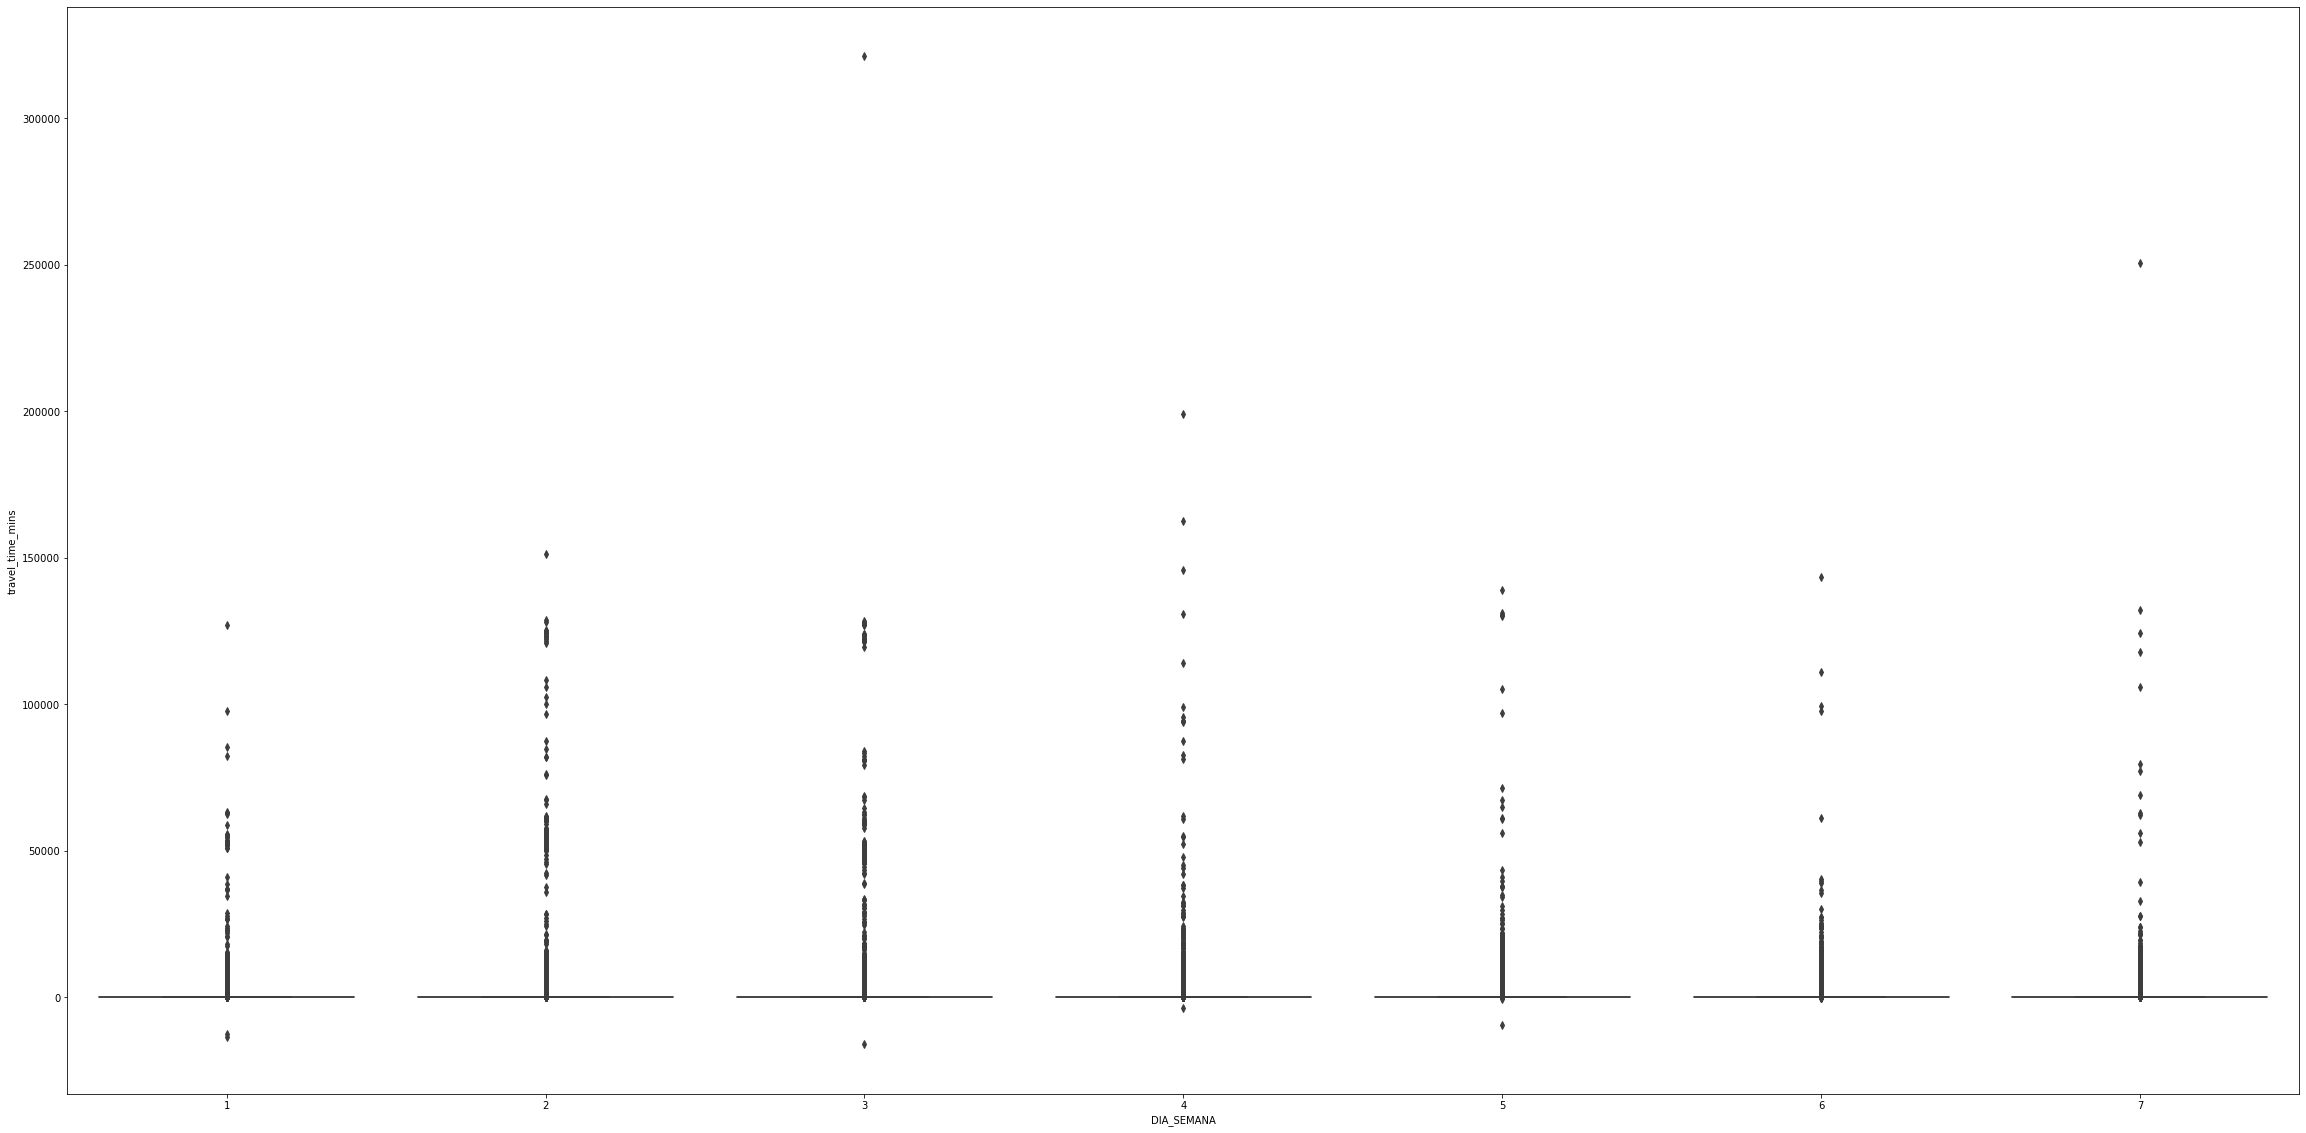

In [36]:
sns.boxplot(x = 'DIA_SEMANA',y='travel_time_mins', data=data_Tracks)

#### Histograma tiempo de viajes en BiciMAD

<AxesSubplot:>

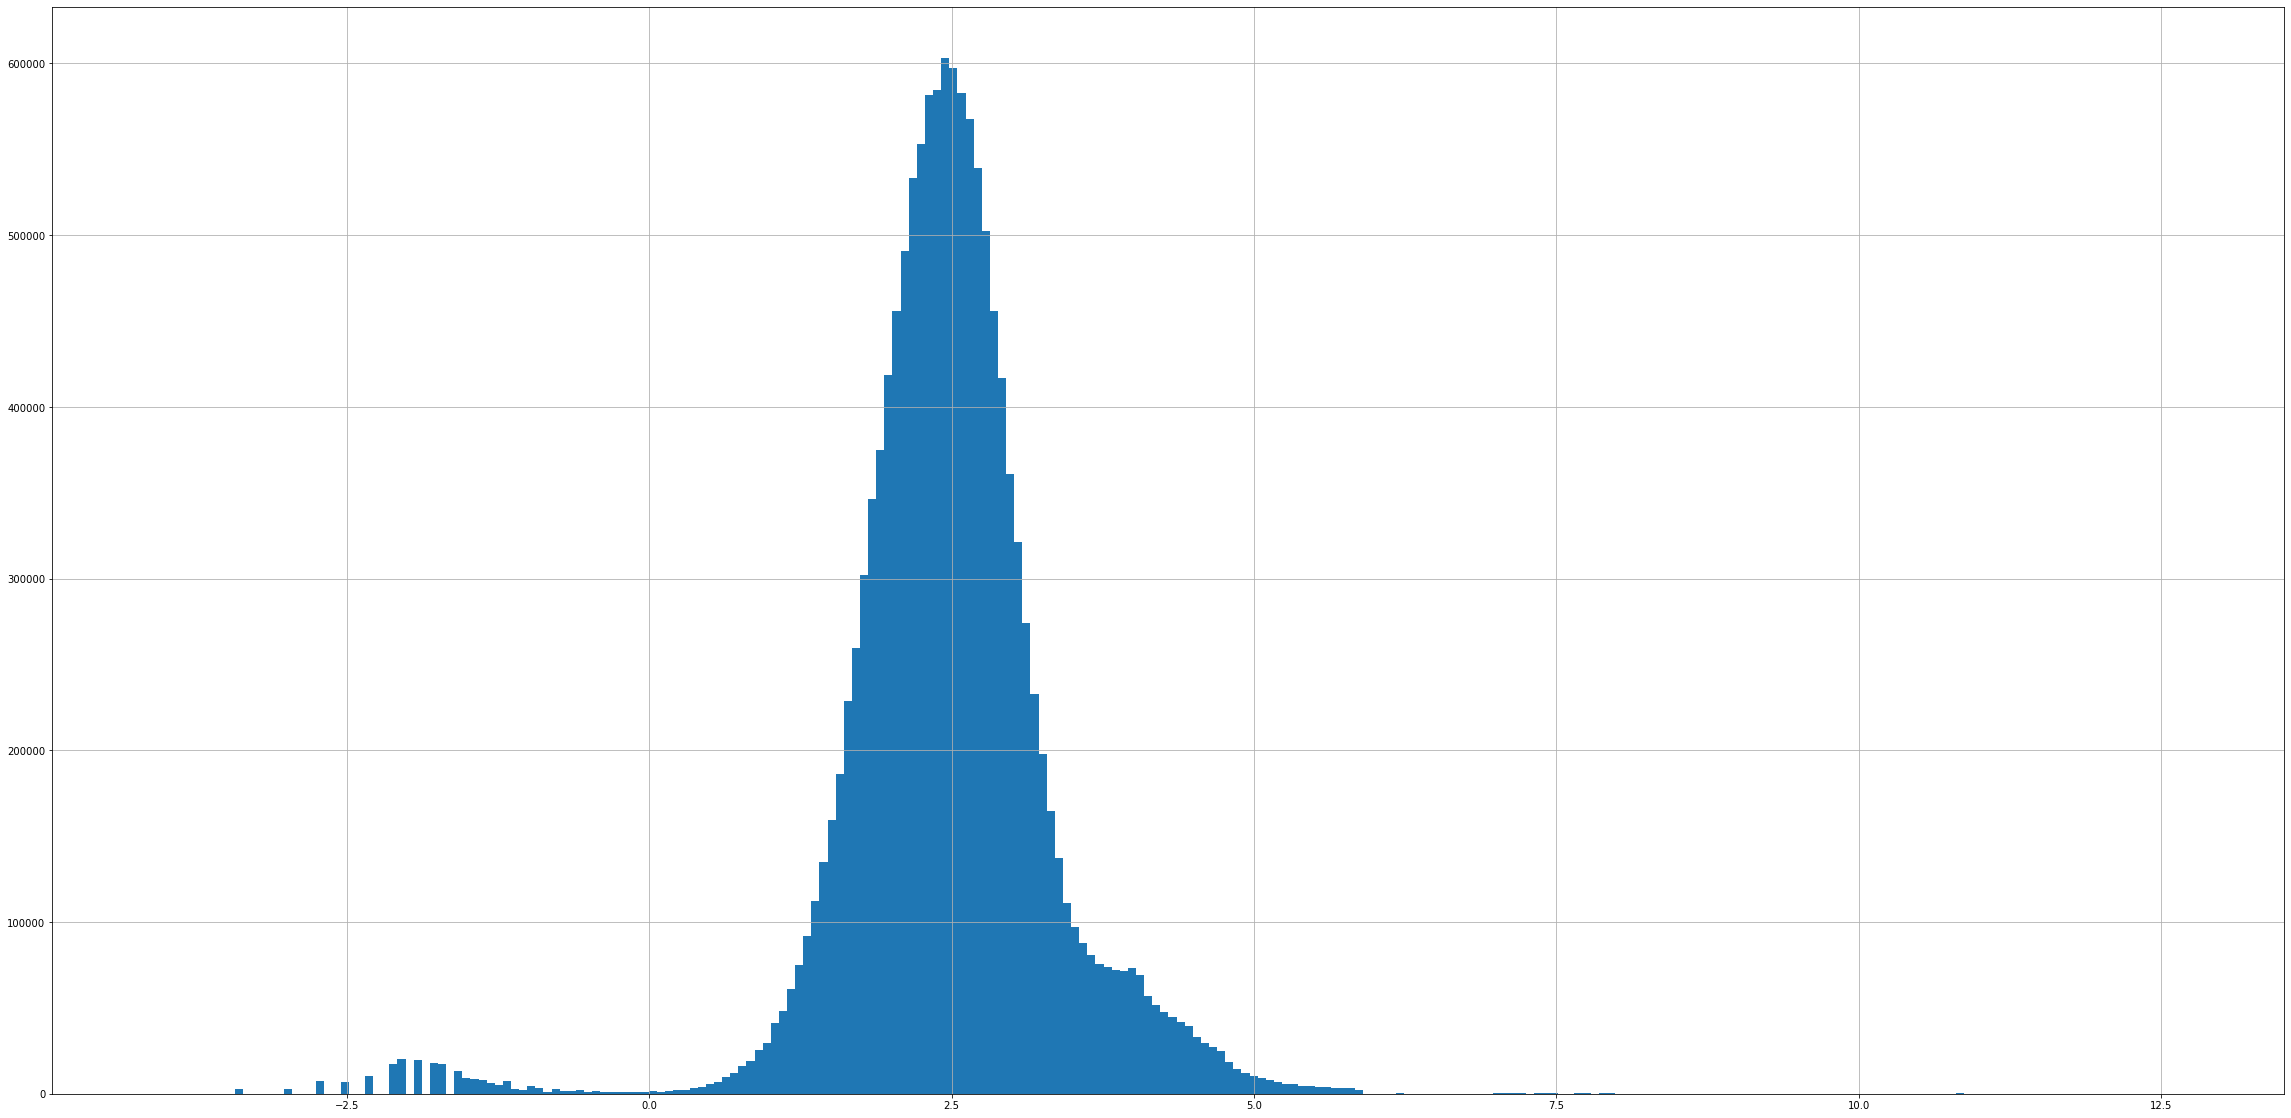

In [34]:
import numpy as np

# Convierte a logaritmo para graficar
df_nonzero_travel_times = data_Tracks.loc[data_Tracks['travel_time_mins'] > 0]

data_Tracks['travel_time_mins_log'] = np.log(df_nonzero_travel_times['travel_time_mins'])
data_Tracks['travel_time_mins_log'].hist(bins=250)


<AxesSubplot:xlabel='DIA_SEMANA', ylabel='travel_time_mins'>

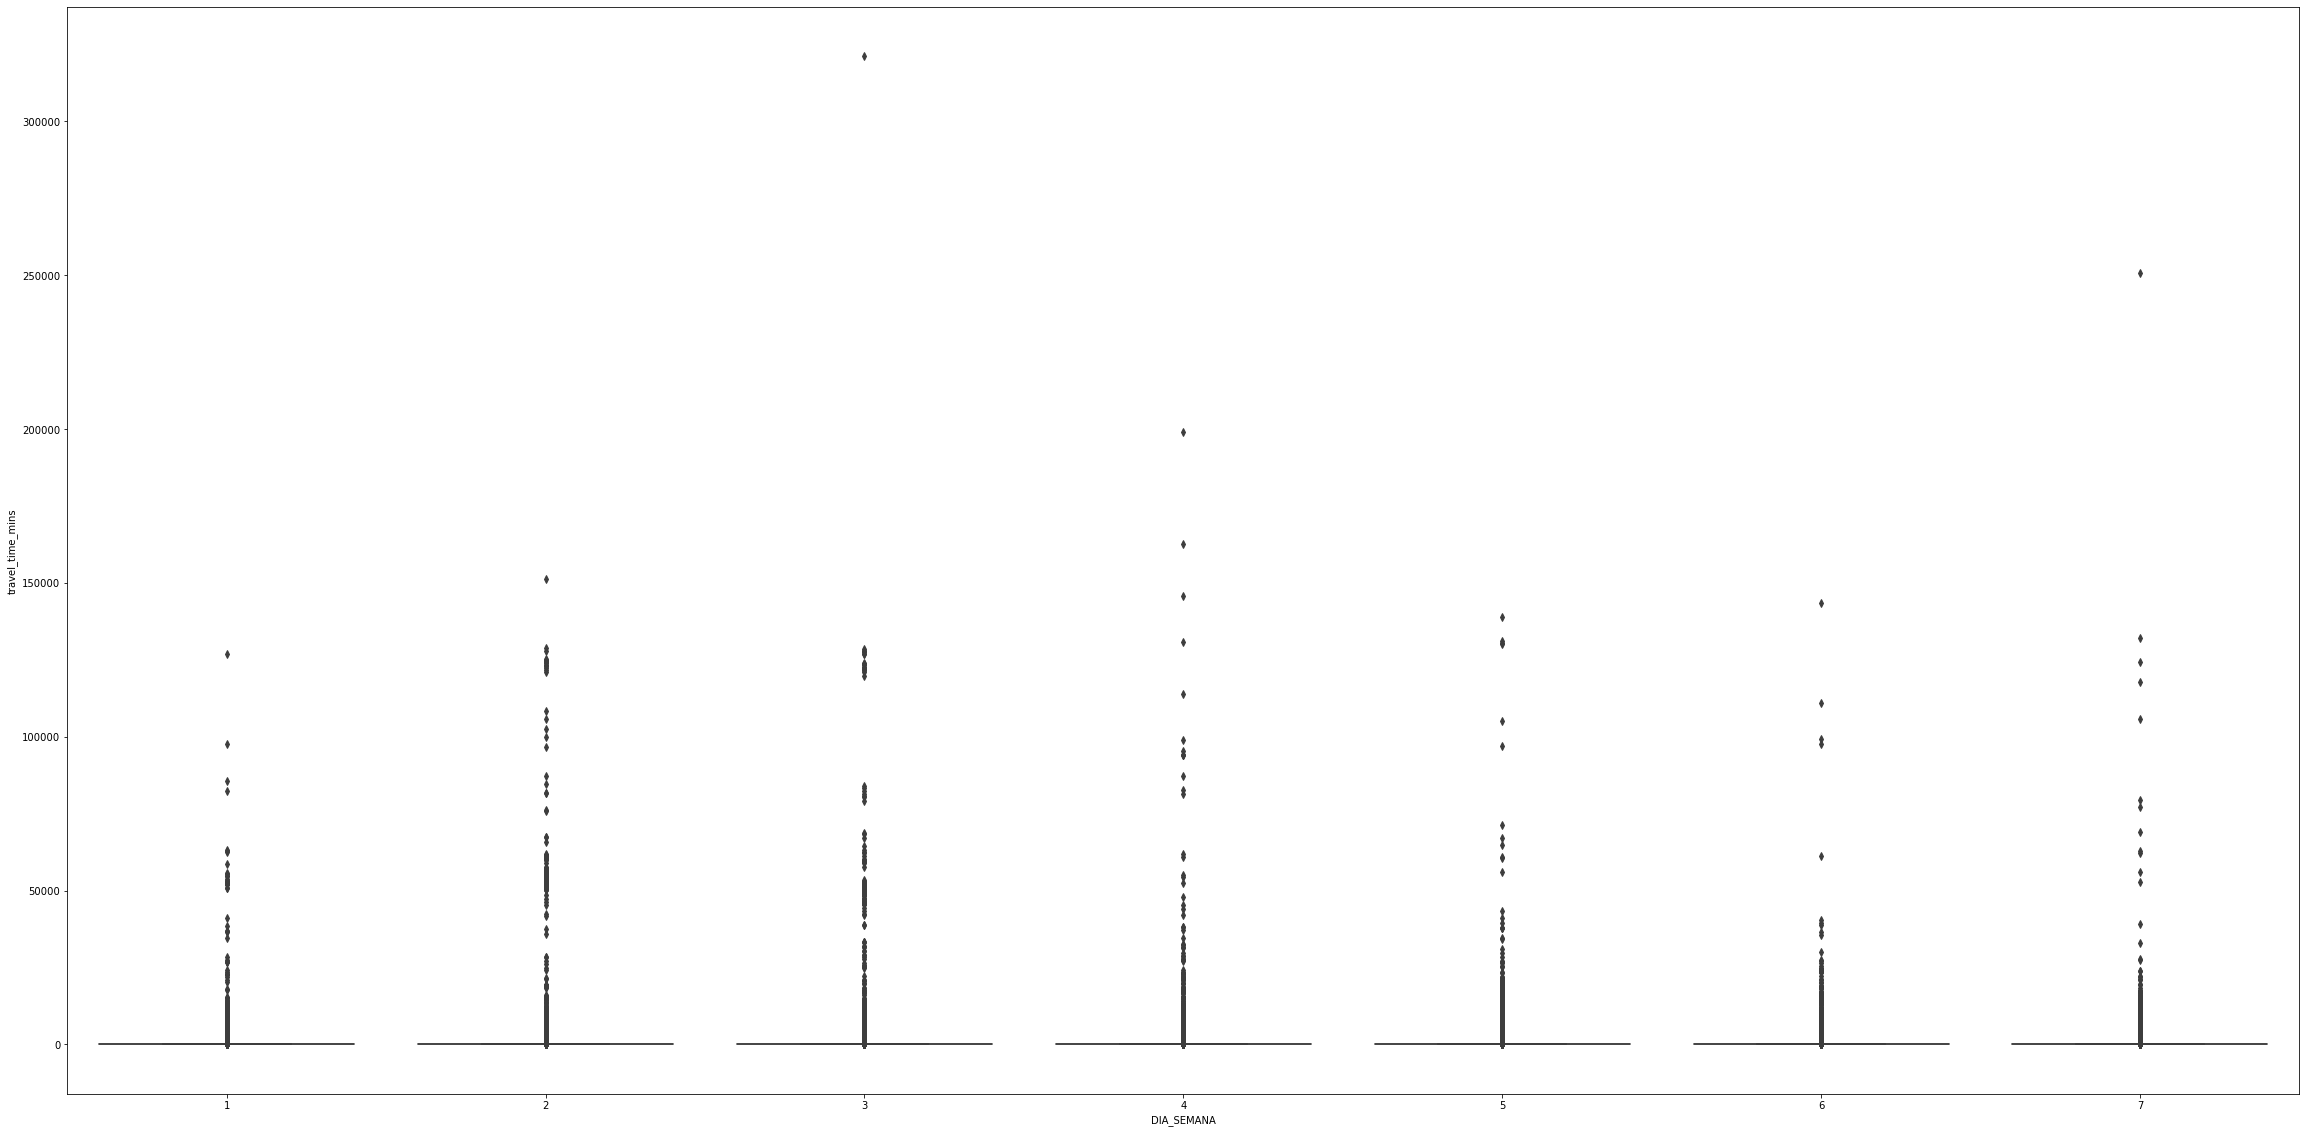

In [38]:
df_non_extreme_travel_times = data_Tracks.loc[data_Tracks['travel_time_mins'] > 0]
sns.boxplot(x = 'DIA_SEMANA',y='travel_time_mins', data=df_non_extreme_travel_times)

### Tipos de Viaje

<AxesSubplot:xlabel='Tipo_Viaje', ylabel='Total'>

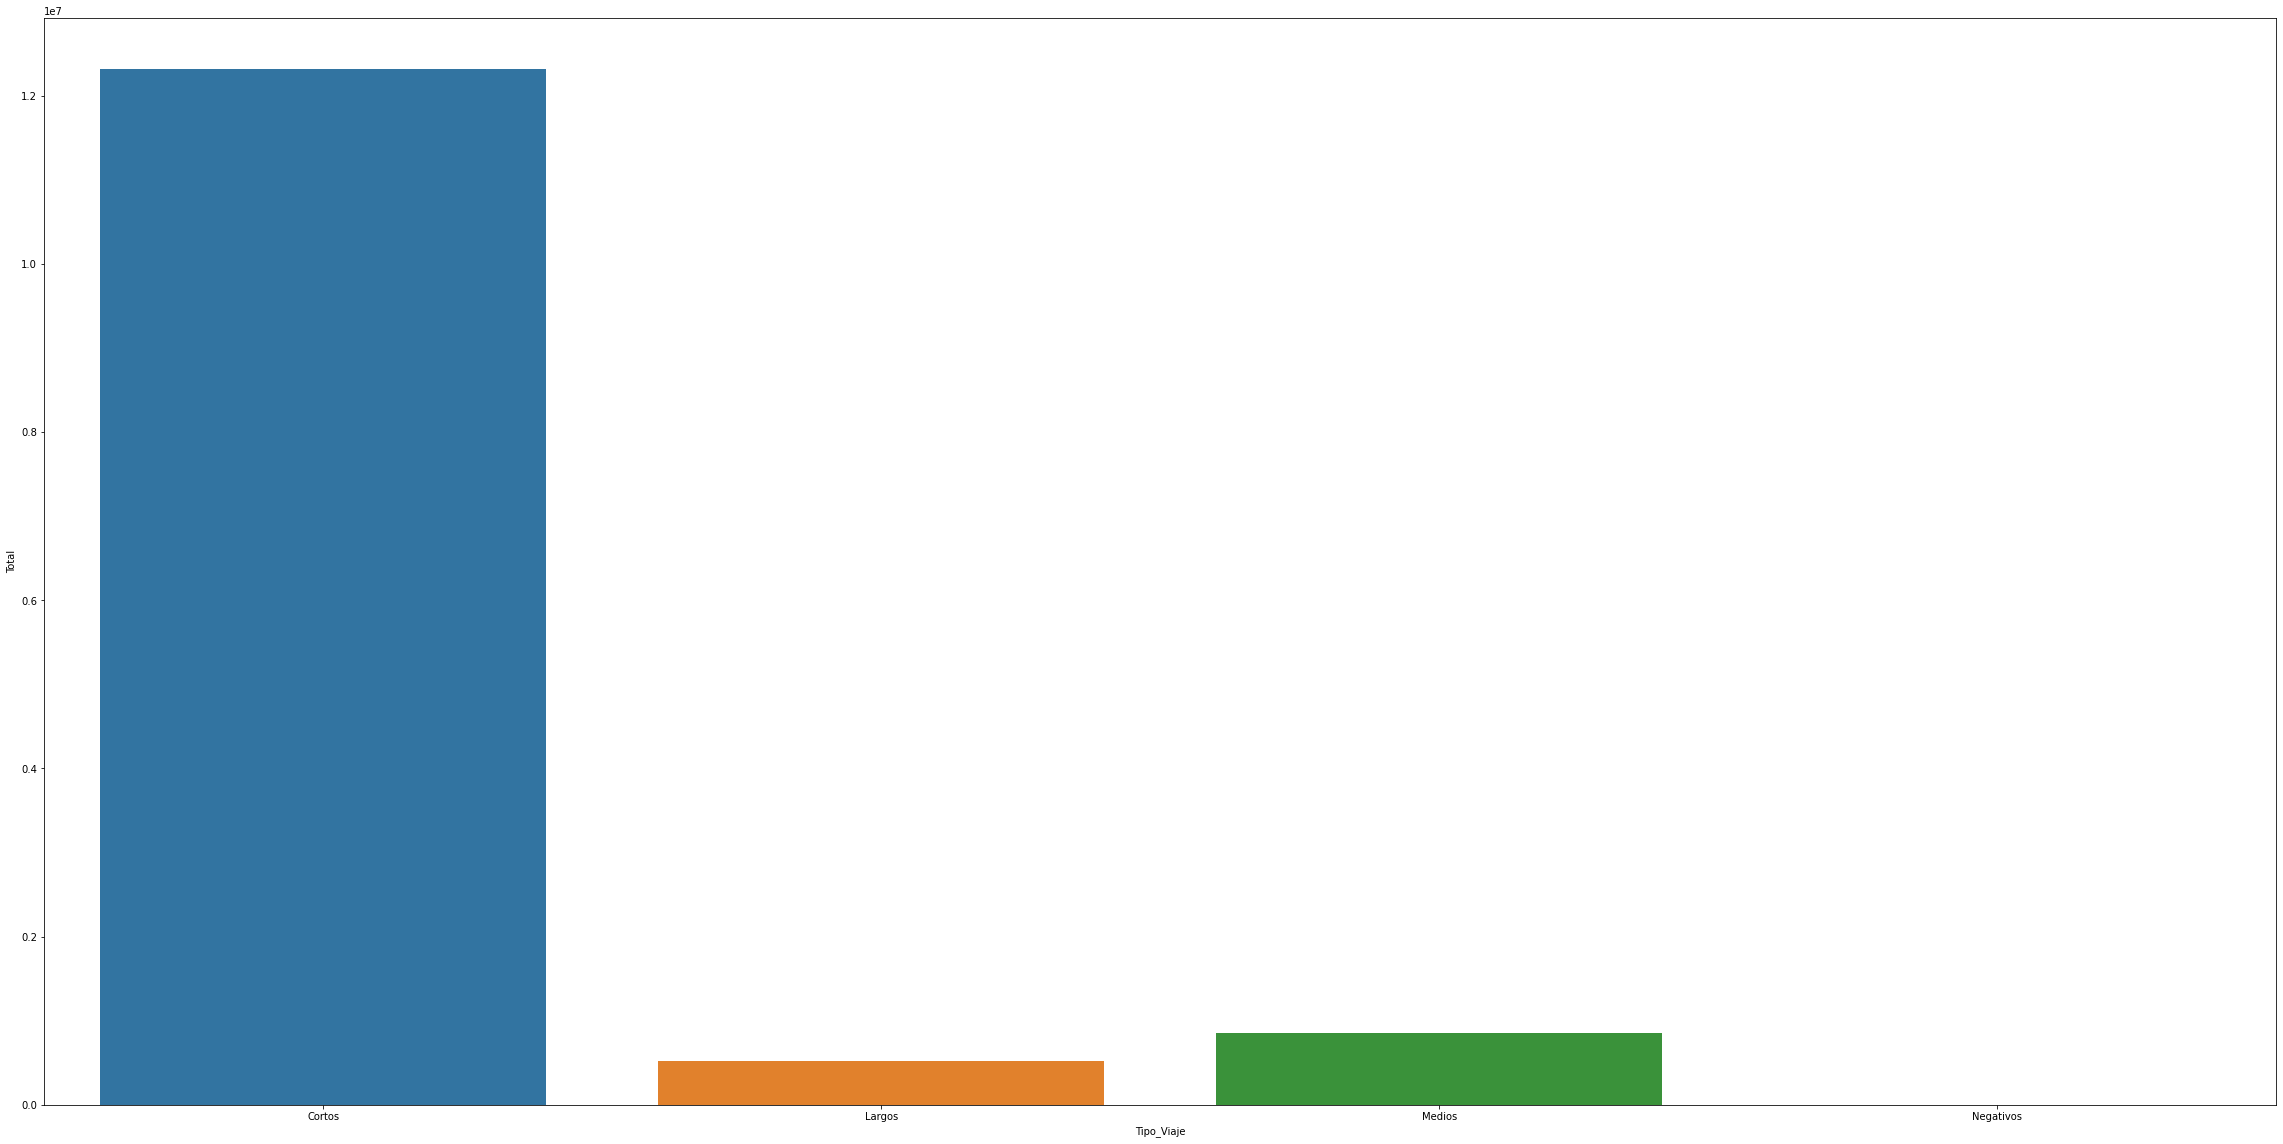

In [71]:
conditionlist = [
    (data_Tracks['travel_time_mins'] < 0) ,
    (data_Tracks['travel_time_mins'] >= 0) & (data_Tracks['travel_time_mins'] <30),
    (data_Tracks['travel_time_mins'] >= 30) & (data_Tracks['travel_time_mins'] <60),
    (data_Tracks['travel_time_mins'] >= 60)]
choicelist = ['Negativos', 'Cortos', 'Medios','Largos']
data_Tracks['Tipo_Viaje'] = np.select(conditionlist, choicelist, default='Not Specified')
data_viajes = data_Tracks.groupby(['Tipo_Viaje']).agg(Total=('Tipo_Viaje', 'count'))
data_viajes = data_viajes.reset_index() 
sns.barplot(x="Tipo_Viaje", y="Total", data=data_viajes) 

### Datos estadísticos por tipo de viaje

In [82]:
data_Tracks.groupby(['Tipo_Viaje'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
Tipo_Viaje,,,,,,,,
Cortos,12309938.0,11.882359,6.124100,0.00,7.350000,10.883333,15.550000,29.983333
Largos,521774.0,214.344737,2263.849377,60.00,70.816667,86.533333,116.000000,321214.816667
Medios,852960.0,41.972666,8.710694,30.00,34.166667,40.433333,49.083333,59.983333
Negativos,161.0,-388.914803,2061.462523,-16161.55,-50.633333,-43.683333,-34.333333,-3.133333


Viajes de menos de 180 segundos

In [69]:
total = data_Tracks.loc[data_Tracks['travel_time'] < 180]['user_type'].count()
print(total)

total_proc = data_Tracks.loc[data_Tracks['travel_time'] < 180]['user_type'].count() / data_Tracks['travel_time'].count() *100
print(total_proc)

408639
2.986072245090605


### EDA: origen vs destino

Estaciones en donde origen y destino son el mismo y el viaje es menor a 3 minutos

In [72]:
df_same_station = data_Tracks.loc[(data_Tracks['idunplug_station'] == data_Tracks['idplug_station'])]
print(df_same_station['ANIO'].count())
print(df_same_station.loc[df_same_station['travel_time'] < 10]['ANIO'].count())
print(df_same_station.loc[df_same_station['travel_time'] < 60]['ANIO'].count())
print(df_same_station.loc[df_same_station['travel_time'] < 180]['ANIO'].count())

570029
87009
207607
214296


### EDA: user_type

```
user_type = 0: Sin Registro
user_type = 1: Anual
user_type = 2: Ocasional
user_type = 3: Trabajador BiciMad
```

<AxesSubplot:xlabel='Tipo', ylabel='DEMANDA'>

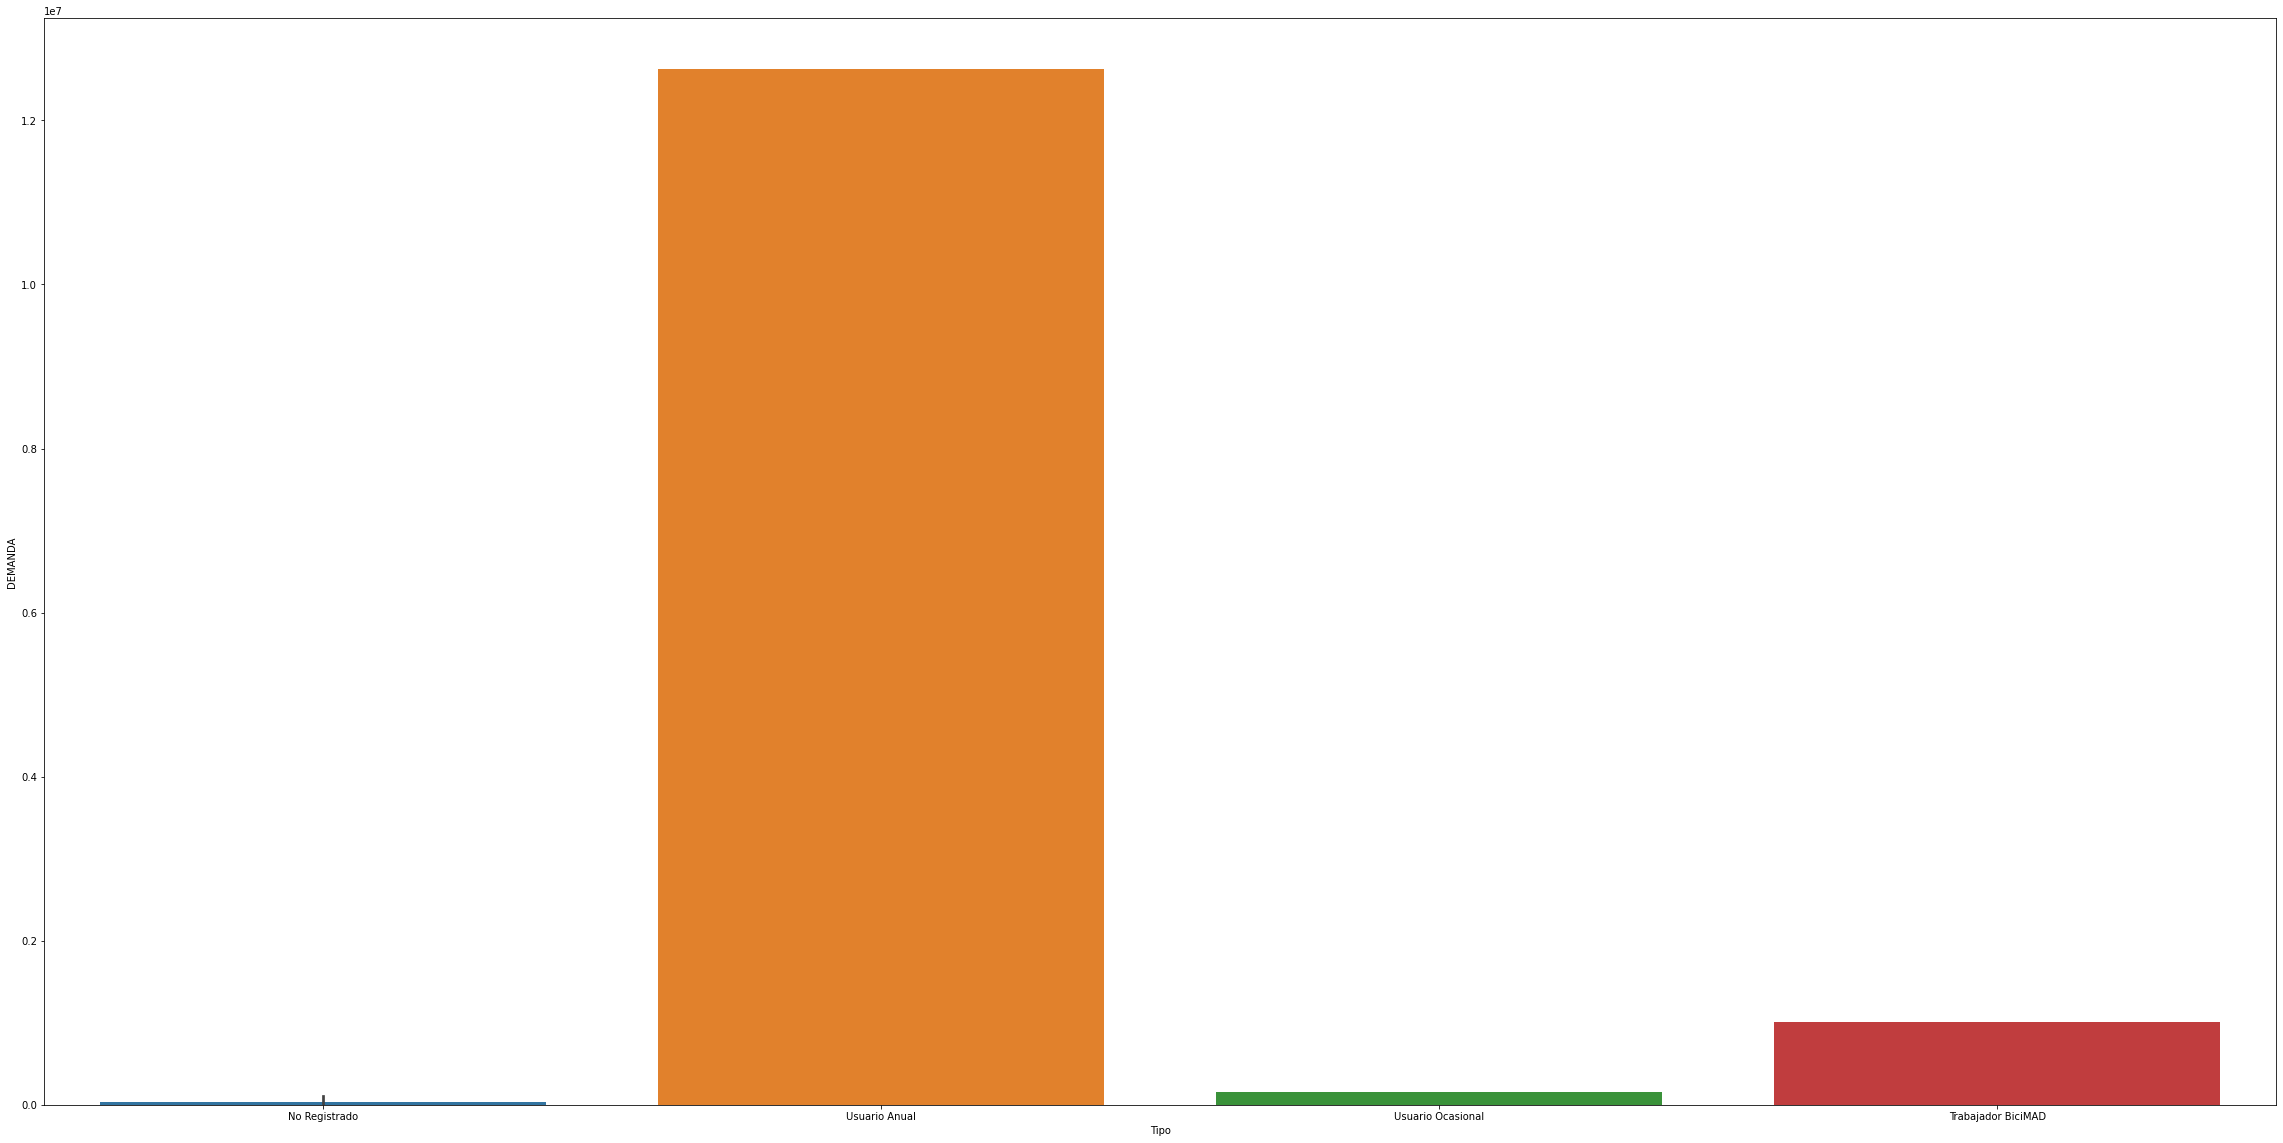

In [101]:
data_tipo_usuario = data_Tracks[['user_type','DEMANDA','travel_time_mins']]
data_tipo_usuario = data_tipo_usuario.groupby(['user_type']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_tipo_usuario = data_tipo_usuario.reset_index() 
conditionlist = [
    (data_tipo_usuario['user_type'] == 0),
    (data_tipo_usuario['user_type'] == 1),
    (data_tipo_usuario['user_type'] == 2),
    (data_tipo_usuario['user_type'] == 3),
    (data_tipo_usuario['user_type'] == 6),
    (data_tipo_usuario['user_type'] == 7)
]
choicelist = ['No Registrado', 'Usuario Anual', 'Usuario Ocasional', 'Trabajador BiciMAD', 'No Registrado','No Registrado']
data_tipo_usuario['Tipo'] = np.select(conditionlist, choicelist, default='Not Specified')
sns.barplot(x="Tipo", y="DEMANDA", data=data_tipo_usuario) 

In [103]:
conditionlist = [
    (data_Tracks['user_type'] == 0),
    (data_Tracks['user_type'] == 1),
    (data_Tracks['user_type'] == 2),
    (data_Tracks['user_type'] == 3),
    (data_Tracks['user_type'] == 6),
    (data_Tracks['user_type'] == 7)
]
choicelist = ['No Registrado', 'Usuario Anual', 'Usuario Ocasional', 'Trabajador BiciMAD', 'No Registrado','No Registrado']
data_Tracks['Tipo'] = np.select(conditionlist, choicelist, default='Not Specified')

data_Tracks.groupby(['Tipo'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
Tipo,,,,,,,,
No Registrado,112399.0,26.926491,34.020262,0.033333,9.416667,15.366667,28.766667,359.083333
Trabajador BiciMAD,913615.0,98.724554,1714.118689,-43.783333,7.150000,28.633333,52.000000,321214.816667
Usuario Anual,12499789.0,15.504673,20.894185,-16161.550000,7.700000,11.400000,16.733333,360.000000
Usuario Ocasional,159030.0,42.892012,42.232431,0.300000,14.433333,28.116667,56.666667,359.766667


### EDA: age_range

```
ageRange = 0: No definido
ageRange = 1: menos 17 años
ageRange = 2: de 17 a 18 años
ageRange = 3: de 19 a 26 años
ageRange = 4: de 27 a 40 años
ageRange = 5: de 41 a 65 años
ageRange = 6: mas de 65 años
```

<AxesSubplot:xlabel='Edad', ylabel='DEMANDA'>

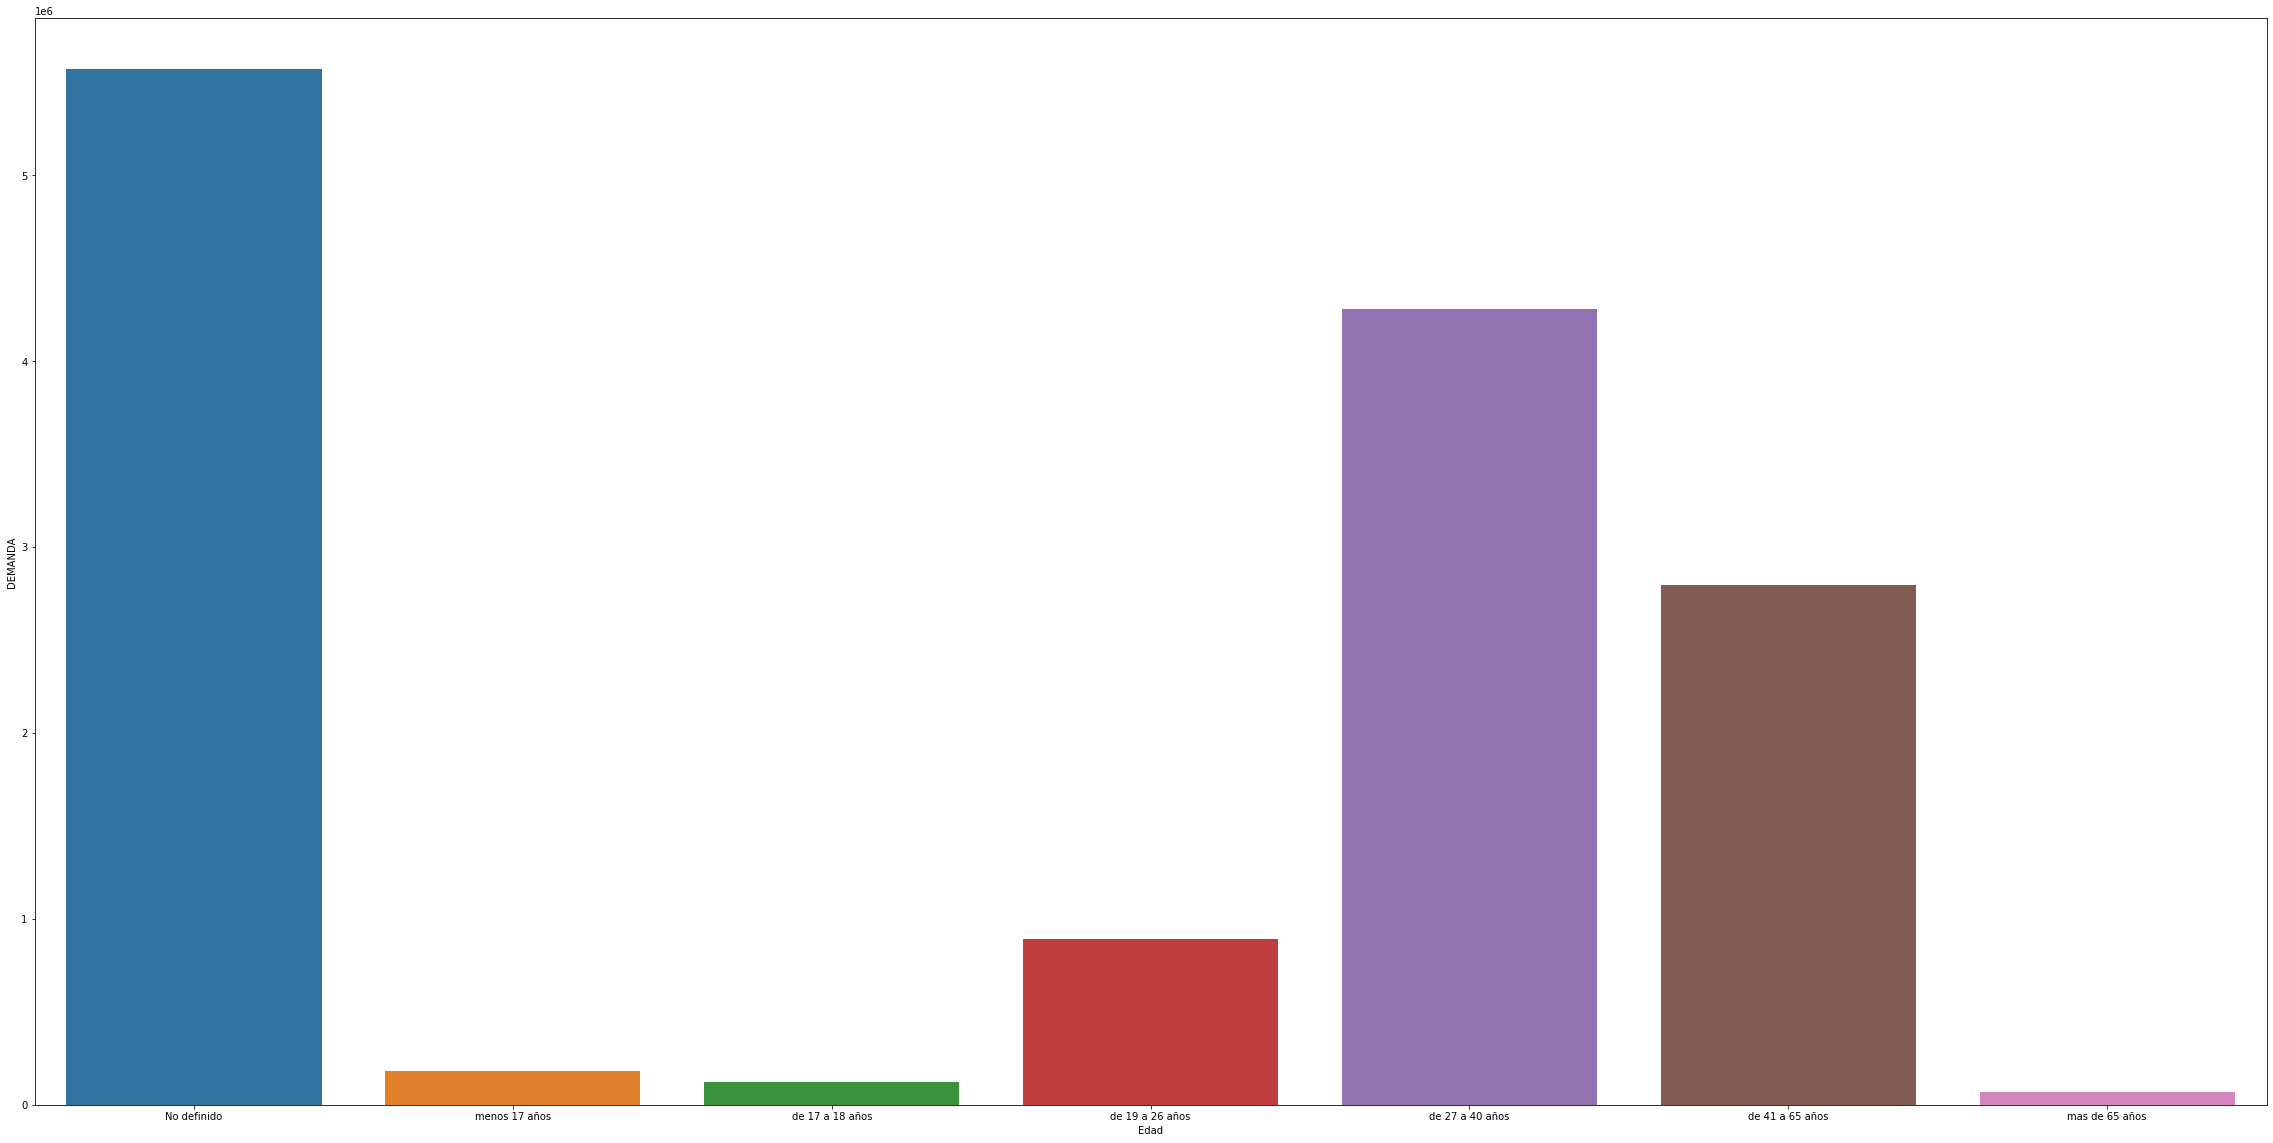

In [114]:
data_edad = data_Tracks[['ageRange','DEMANDA']]
data_edad = data_edad.groupby(['ageRange']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_edad = data_edad.reset_index() 
conditionlist = [
    (data_edad['ageRange'] == 0),
    (data_edad['ageRange'] == 1),
    (data_edad['ageRange'] == 2),
    (data_edad['ageRange'] == 3),
    (data_edad['ageRange'] == 4),
    (data_edad['ageRange'] == 5),
    (data_edad['ageRange'] == 6)
]
choicelist = ['No definido', 'menos 17 años', 'de 17 a 18 años', 
              'de 19 a 26 años', 'de 27 a 40 años','de 41 a 65 años','mas de 65 años']
data_edad['Edad'] = np.select(conditionlist, choicelist, default='Not Specified')
sns.barplot(x="Edad", y="DEMANDA", data=data_edad)



In [115]:
conditionlist = [
    (data_Tracks['ageRange'] == 0),
    (data_Tracks['ageRange'] == 1),
    (data_Tracks['ageRange'] == 2),
    (data_Tracks['ageRange'] == 3),
    (data_Tracks['ageRange'] == 4),
    (data_Tracks['ageRange'] == 5),
    (data_Tracks['ageRange'] == 6)
]
choicelist = ['No definido', 'menos 17 años', 'de 17 a 18 años', 
              'de 19 a 26 años', 'de 27 a 40 años','de 41 a 65 años','mas de 65 años']
data_Tracks['Edad'] = np.select(conditionlist, choicelist, default='Not Specified')

data_Tracks.groupby(['Edad'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
Edad,,,,,,,,
No definido,5497710.0,22.001652,414.914853,-16161.550000,8.083333,12.333333,19.200000,250757.716667
de 17 a 18 años,120313.0,16.114691,88.019997,-45.966667,6.716667,10.566667,16.783333,25132.950000
de 19 a 26 años,875407.0,17.246992,379.882828,-13704.316667,7.033333,10.916667,16.616667,321214.816667
de 27 a 40 años,4215913.0,19.191622,387.252676,-188.466667,7.533333,11.250000,16.566667,162585.383333
de 41 a 65 años,2753208.0,24.200351,578.370105,-68.500000,7.800000,11.816667,17.883333,199134.033333
mas de 65 años,68593.0,19.520578,24.513477,-11.833333,7.916667,12.250000,19.900000,359.900000
menos 17 años,153689.0,45.387626,670.530082,0.000000,0.200000,12.466667,38.216667,97127.883333


### EDA: Temporada

<AxesSubplot:xlabel='TEMPORADA', ylabel='DEMANDA'>

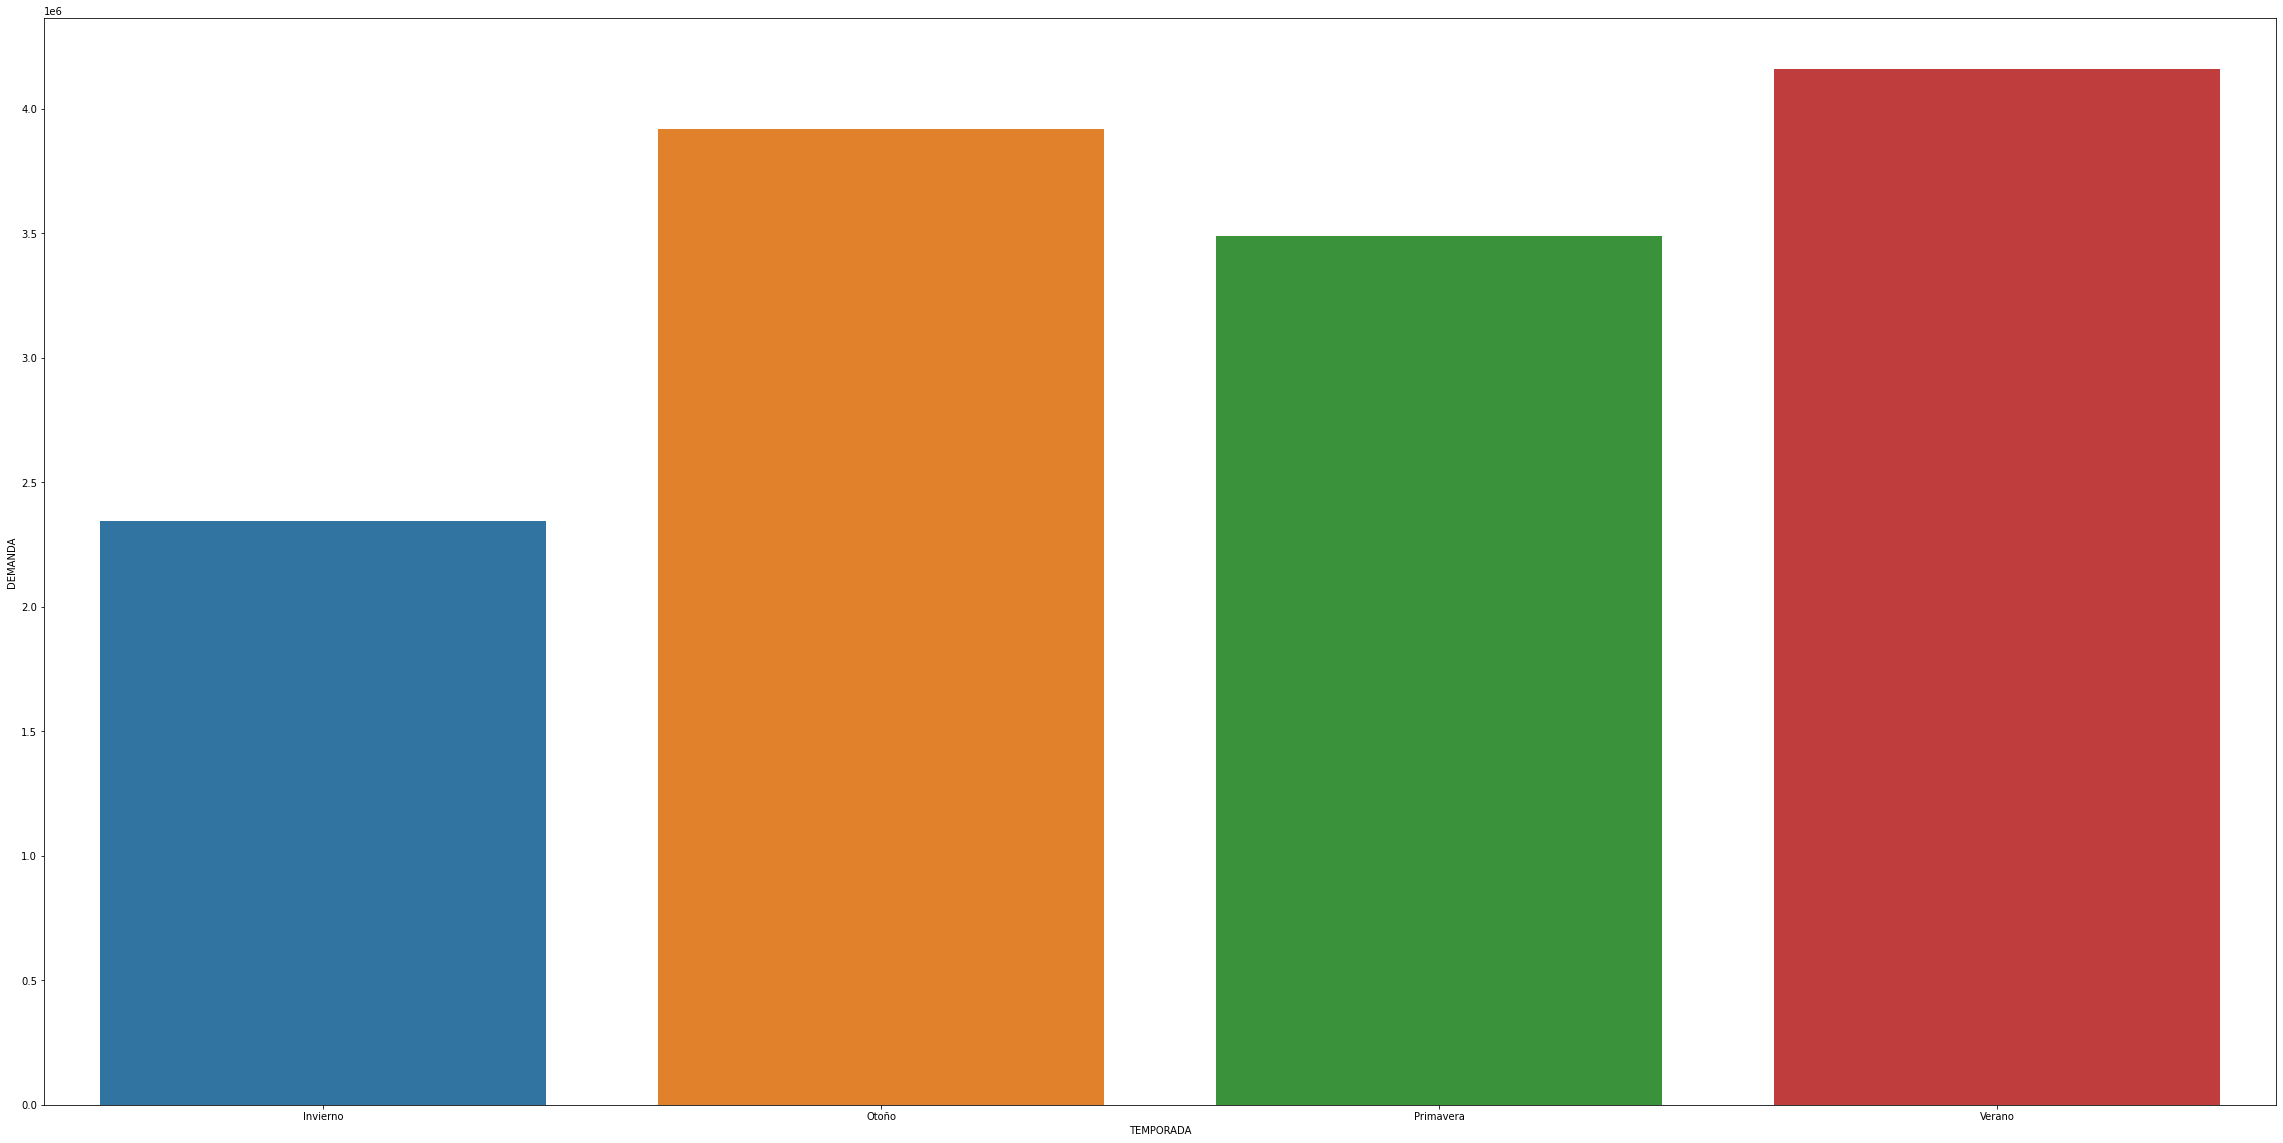

In [118]:
data_temporada = data_Tracks[['TEMPORADA','DEMANDA']]
data_temporada = data_temporada.groupby(['TEMPORADA']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_temporada = data_temporada.reset_index() 
sns.barplot(x="TEMPORADA", y="DEMANDA", data=data_temporada) 

In [119]:
data_Tracks.groupby(['TEMPORADA'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
TEMPORADA,,,,,,,,
Invierno,2329632.0,30.039515,891.528291,0.000000,7.466667,11.216667,17.016667,151307.983333
Otoño,3890059.0,19.375323,247.723155,-16161.550000,7.716667,11.700000,17.650000,199134.033333
Primavera,3355168.0,20.297826,206.422927,0.000000,7.866667,12.033333,18.766667,162585.383333
Verano,4109974.0,19.560762,335.525952,-657.766667,7.816667,11.916667,18.100000,321214.816667


### EDA: AM_PM

<AxesSubplot:xlabel='AM_PM', ylabel='DEMANDA'>

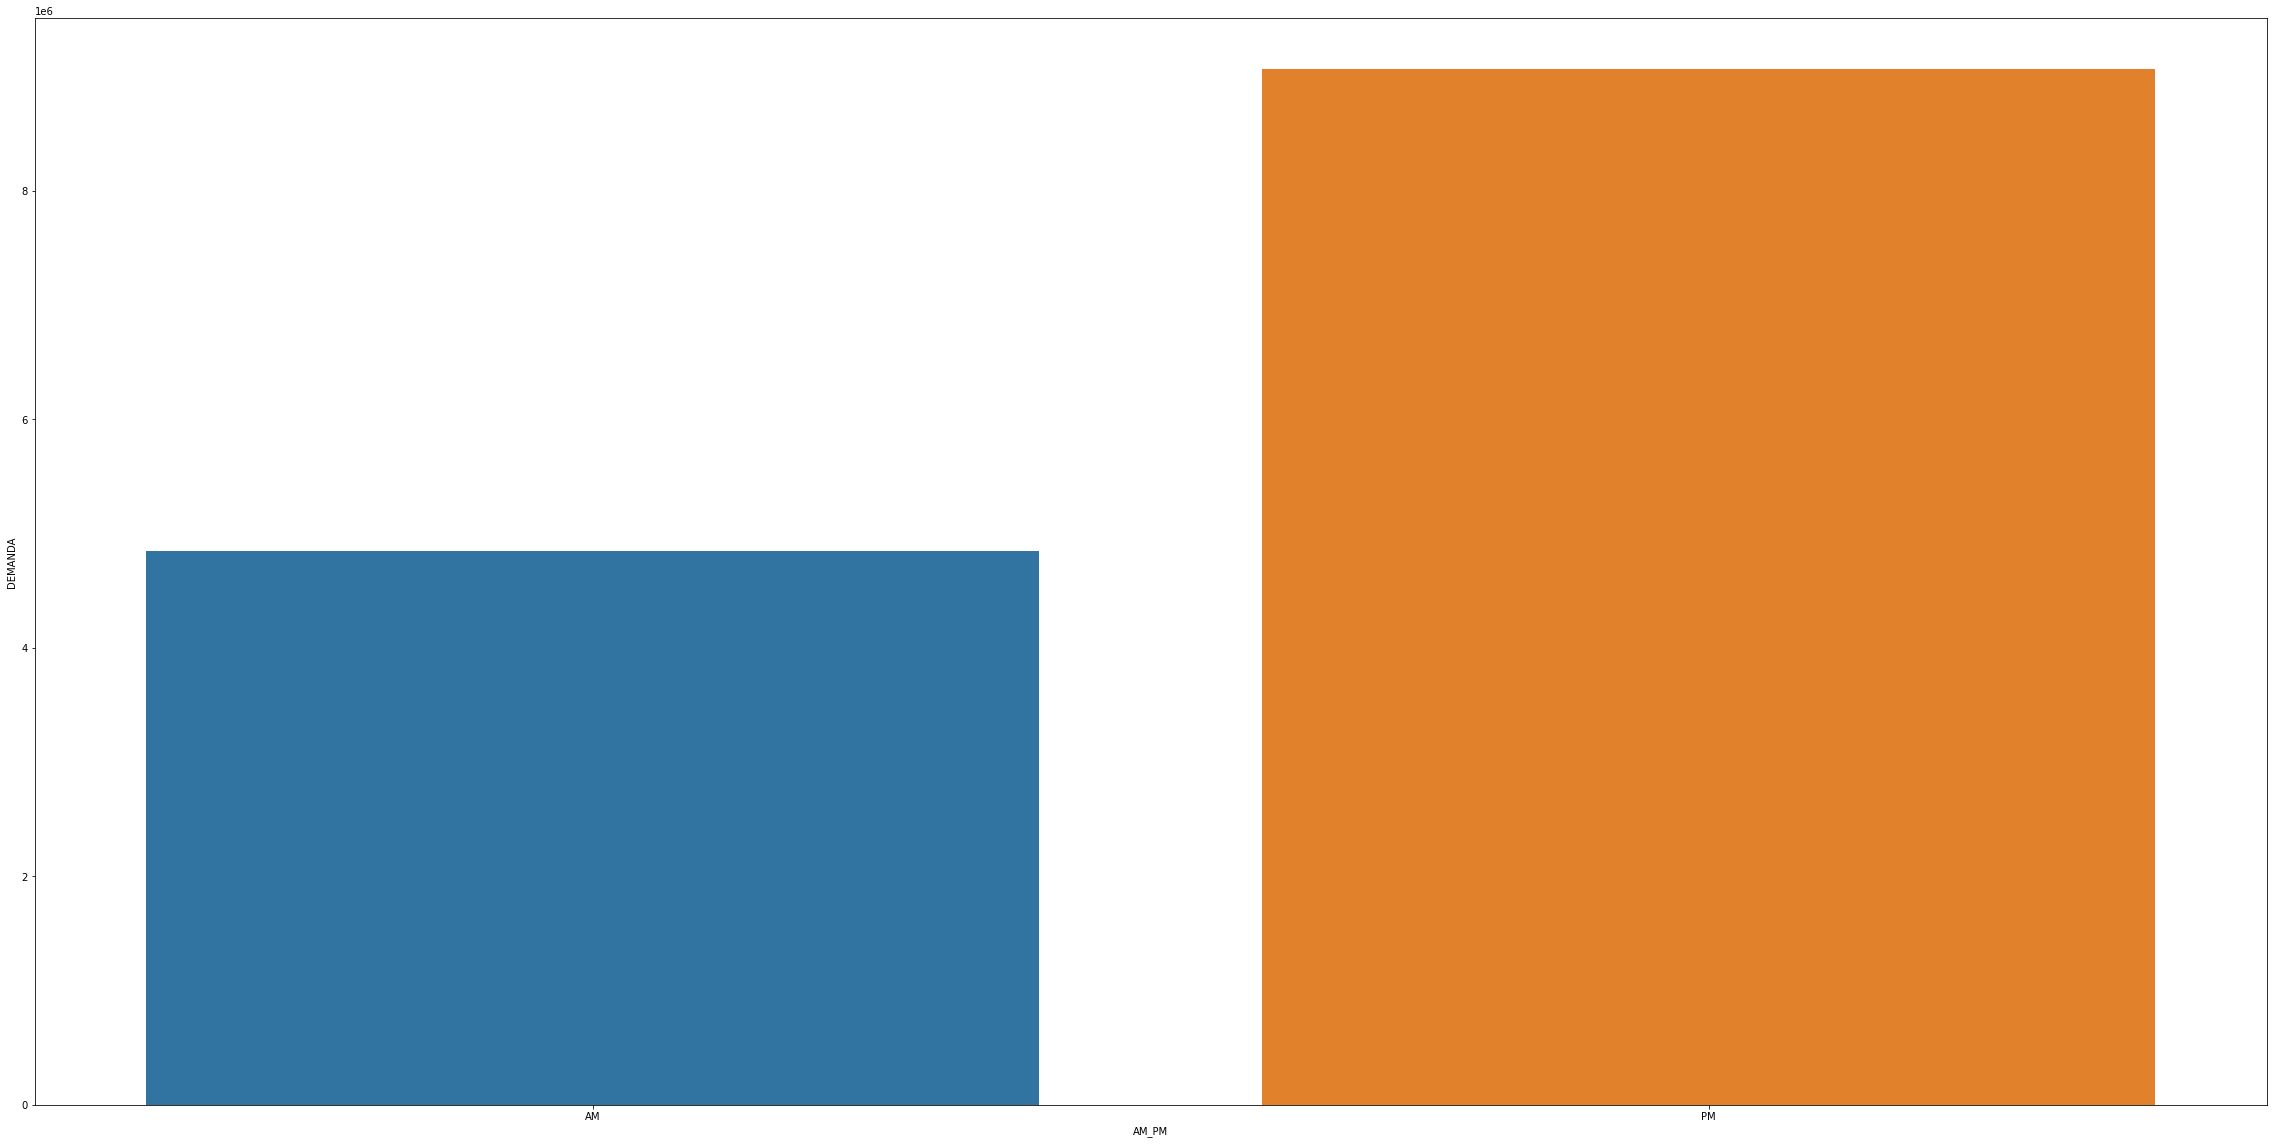

In [121]:
data_horario = data_Tracks[['AM_PM','DEMANDA']]
data_horario = data_horario.groupby(['AM_PM']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_horario = data_horario.reset_index() 
sns.barplot(x="AM_PM", y="DEMANDA", data=data_horario)

In [122]:
data_Tracks.groupby(['AM_PM'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
AM_PM,,,,,,,,
AM,4755469.0,23.582427,569.197828,-16161.55,7.483333,11.466667,17.483333,321214.816667
PM,8929364.0,20.348986,359.726781,-12423.10,7.866667,11.916667,18.166667,162585.383333


### EDA: Stations

Stations de salida mas populares

In [116]:
data_Tracks['idunplug_station'].value_counts().sort_values(ascending=False)[:5]

43     178097
175    173517
57     173011
163    171434
135    166423
Name: idunplug_station, dtype: int64

Stations de llegada mas populares

In [117]:
data_Tracks['idplug_station'].value_counts().sort_values(ascending=False)[:5]

43     181083
175    174726
163    172598
57     171903
135    171395
Name: idplug_station, dtype: int64

# Serie de tiempo

In [32]:
data_serie = data_Tracks[['ANIO','MES','DIA','HORA','idunplug_station','DEMANDA']]
data_serie['FECHA'] =pd.to_datetime({'year': data_serie['ANIO'],
                                          'month': data_serie["MES"]
                                          ,'day':  data_serie['DIA']
                                         # ,'hour':data_serie['HORA']
                                          },
                                          format='%d-%m-%Y', errors='coerce')
data_serie

<ipython-input-32-cf28d4c801d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_serie['FECHA'] =pd.to_datetime({'year': data_serie['ANIO'],


,ANIO,MES,DIA,HORA,idunplug_station,DEMANDA,FECHA
0,2017,3,31,23,100,1,2017-03-31
1,2017,3,31,23,102,1,2017-03-31
2,2017,3,31,23,102,1,2017-03-31
3,2017,3,31,23,103,1,2017-03-31
4,2017,3,31,23,103,1,2017-03-31
...,...,...,...,...,...,...,...
13684828,2020,12,31,22,67,1,2020-12-31
13684829,2020,12,31,22,76,1,2020-12-31
13684830,2020,12,31,22,80,1,2020-12-31
13684831,2020,12,31,22,81,1,2020-12-31


In [33]:
data_serie_tiempo = data_serie.groupby(['FECHA']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_serie_tiempo = data_serie_tiempo.reset_index()
data_serie_tiempo

,FECHA,DEMANDA
0,2017-03-31,291
1,2017-04-01,7687
2,2017-04-02,6991
3,2017-04-03,9104
4,2017-04-04,9972
...,...,...
1293,2020-12-27,4583
1294,2020-12-28,6144
1295,2020-12-29,6932
1296,2020-12-30,7468


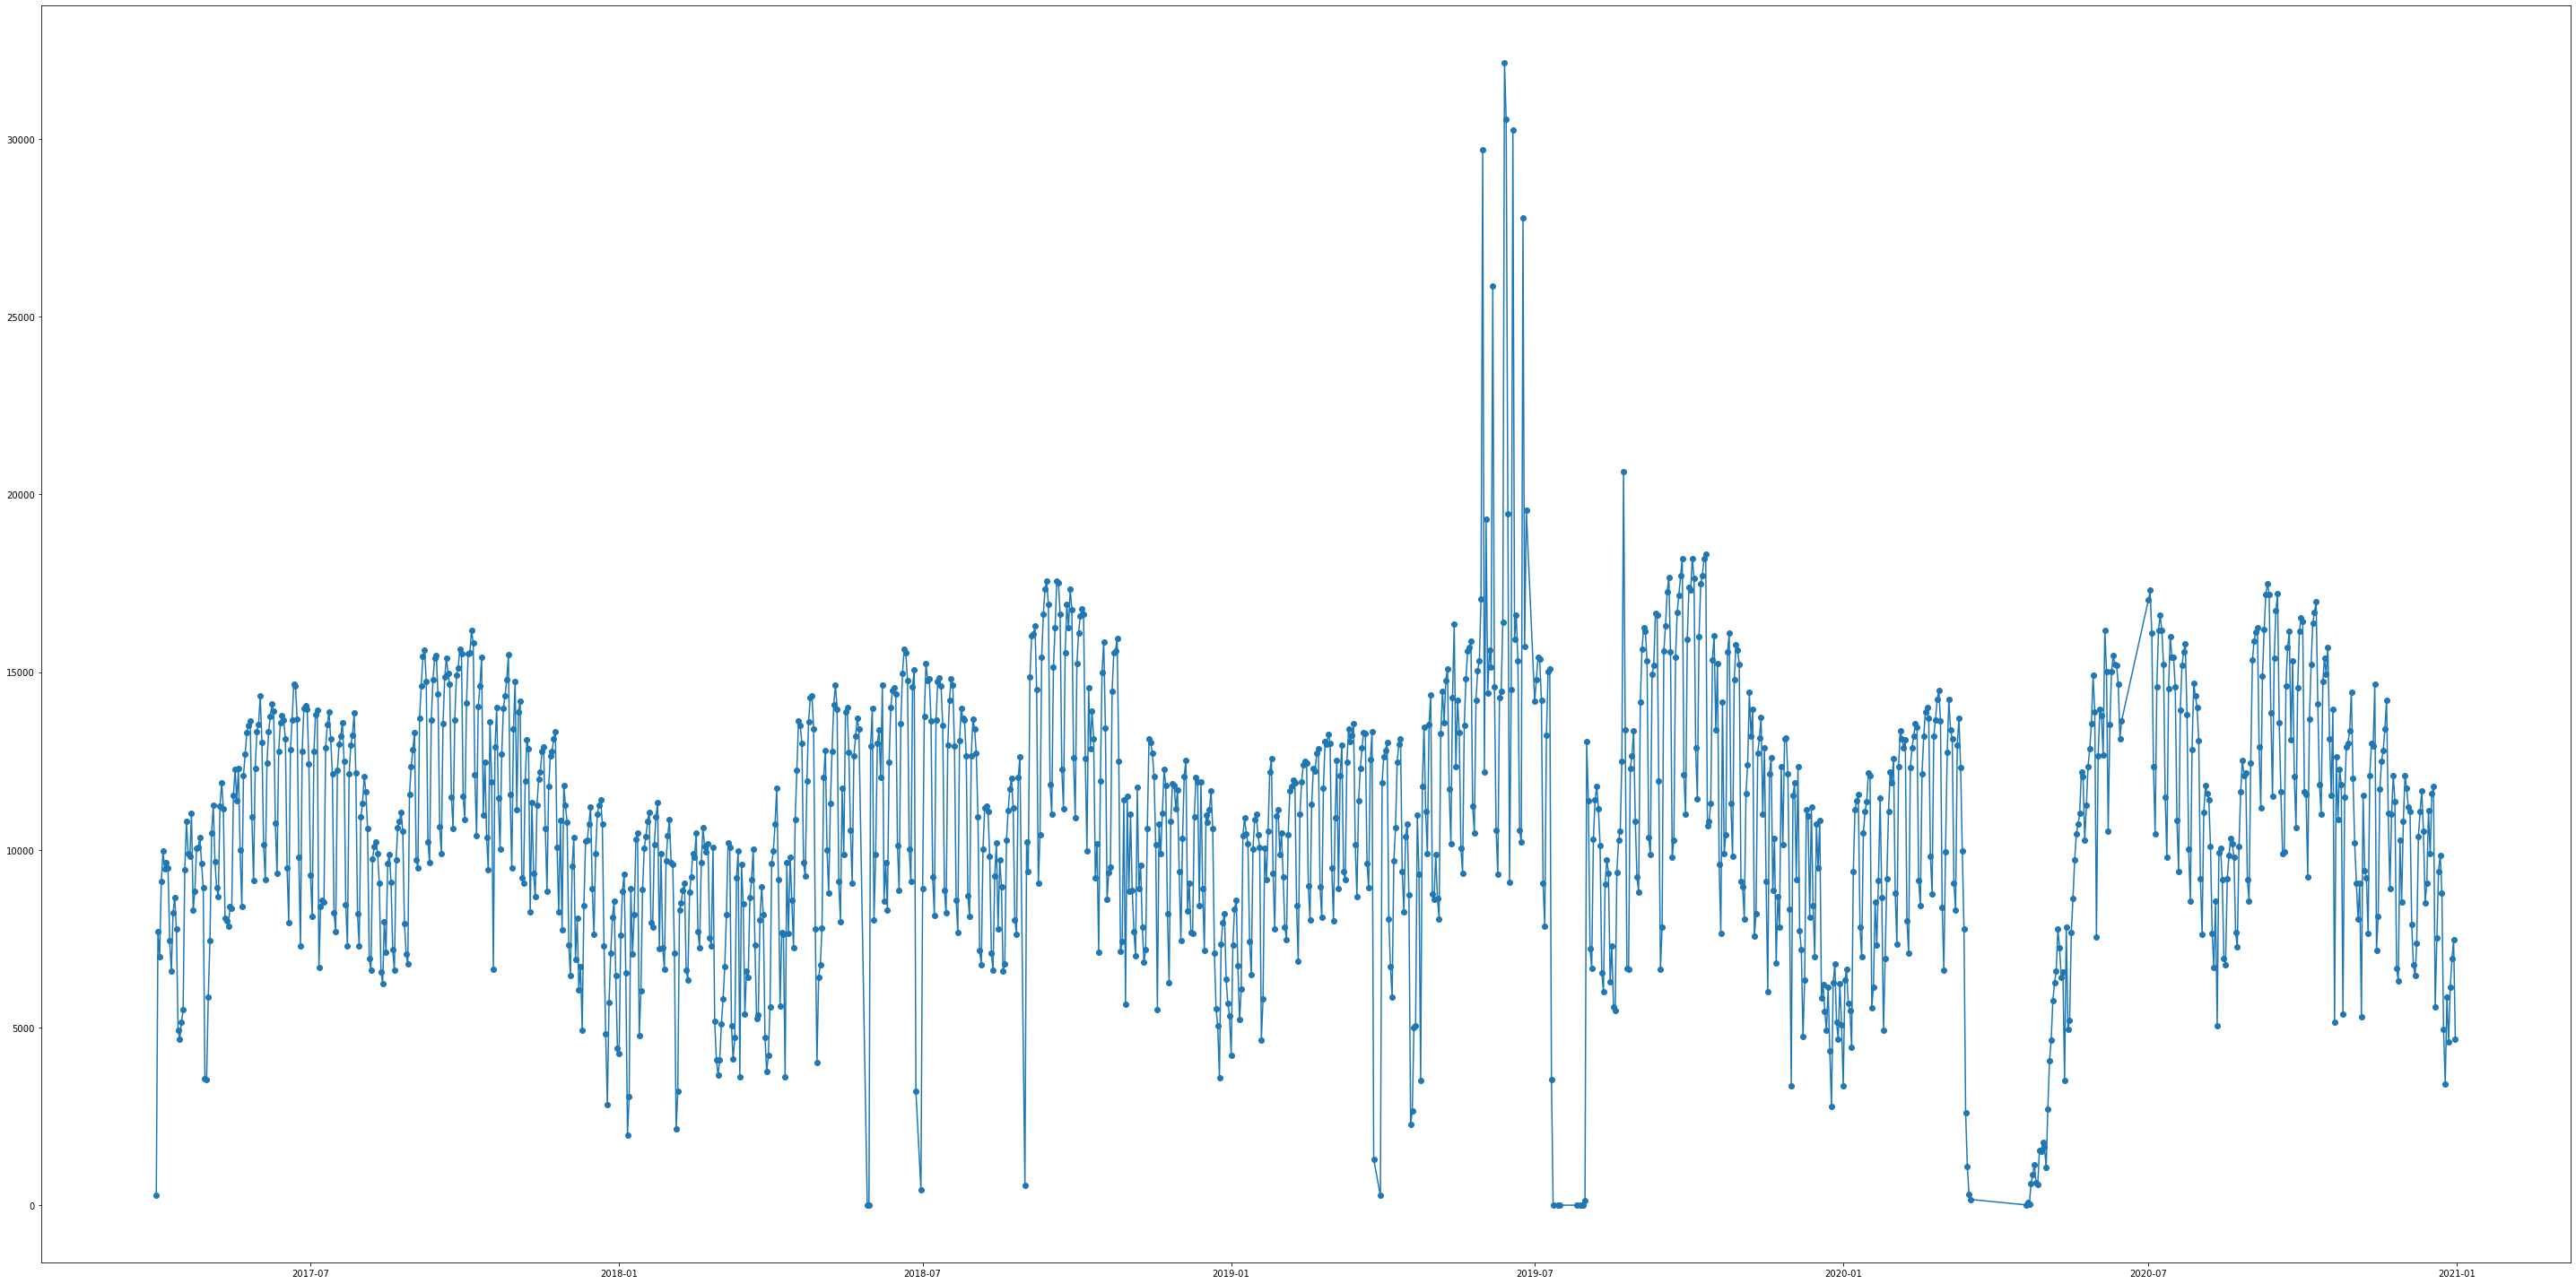

In [34]:
x = data_serie_tiempo['FECHA']
y = data_serie_tiempo['DEMANDA']

plt.plot_date(x, y,linestyle ='solid')
plt.tight_layout()
plt.show()

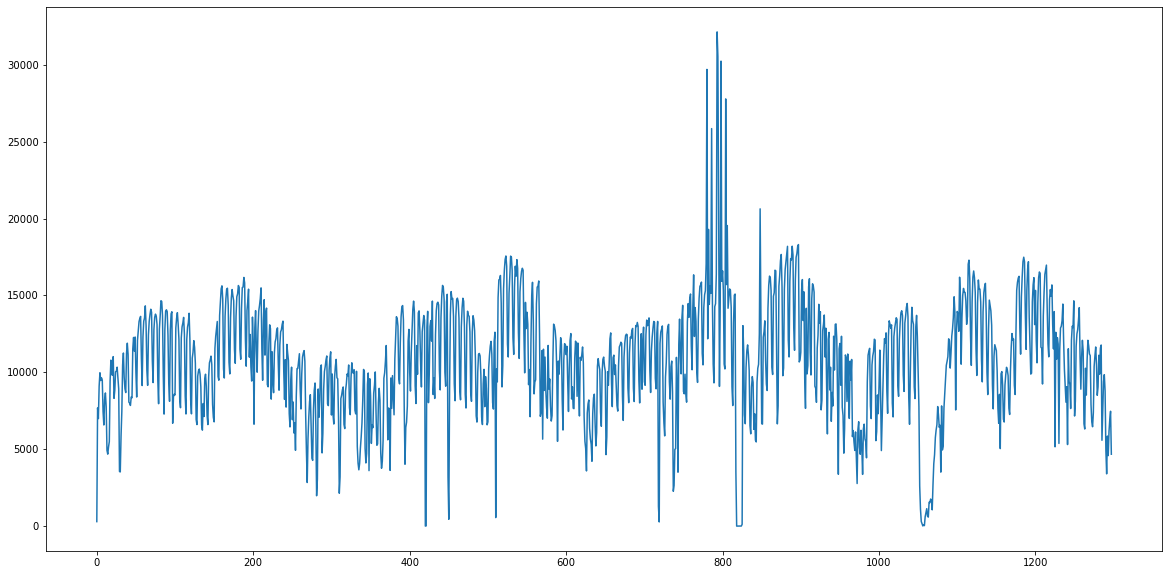

In [43]:
plot = data_serie_tiempo['DEMANDA'].plot(figsize=(20, 10))

In [51]:
ciclo, tend = sm.tsa.filters.hpfilter(data_serie_tiempo['DEMANDA'])
data_serie_tiempo['TENDENCIA'] = tend

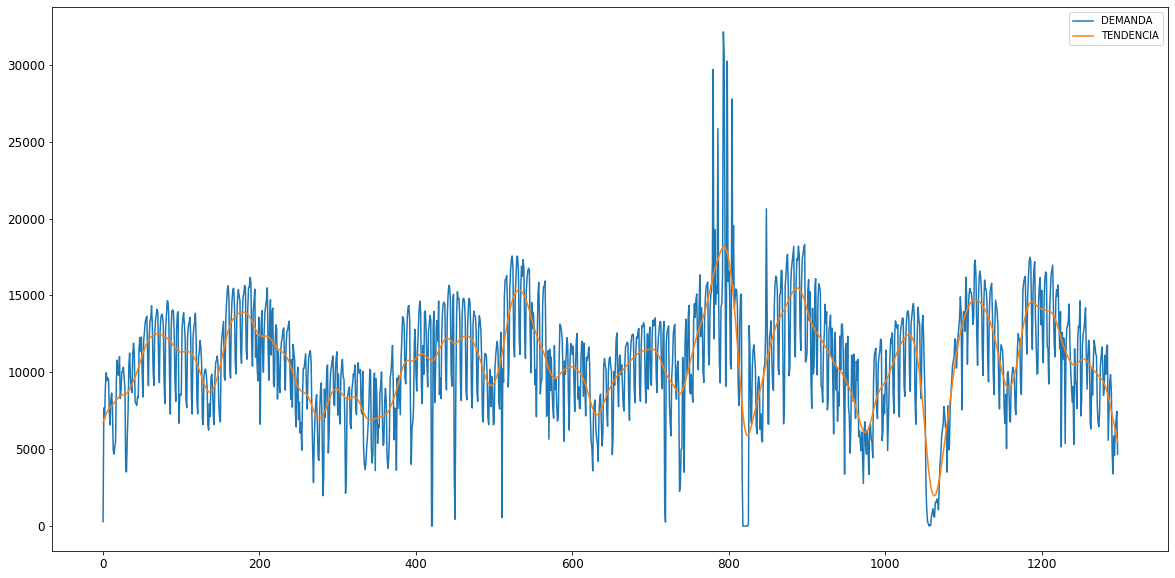

In [52]:
data_serie_tiempo[['DEMANDA','TENDENCIA']].plot(figsize=(20, 10), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);


<ipython-input-53-69f20886f623>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  descomposicion = sm.tsa.seasonal_decompose(data_serie_tiempo['TENDENCIA'],


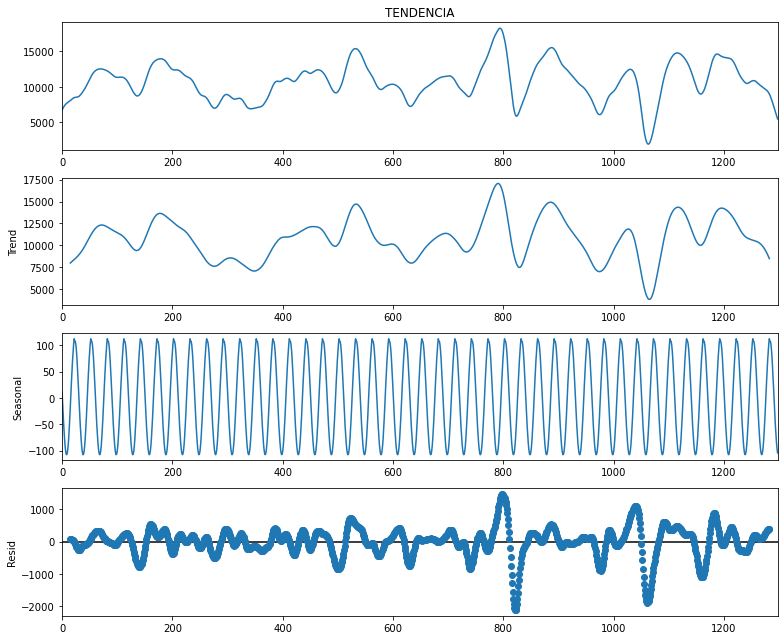

In [53]:
descomposicion = sm.tsa.seasonal_decompose(data_serie_tiempo['TENDENCIA'],
                                                  model='additive', freq=30)  
fig = descomposicion.plot()


<ipython-input-54-e9b024c881f0>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  descomposicion = sm.tsa.seasonal_decompose(data_serie_tiempo['TENDENCIA'],


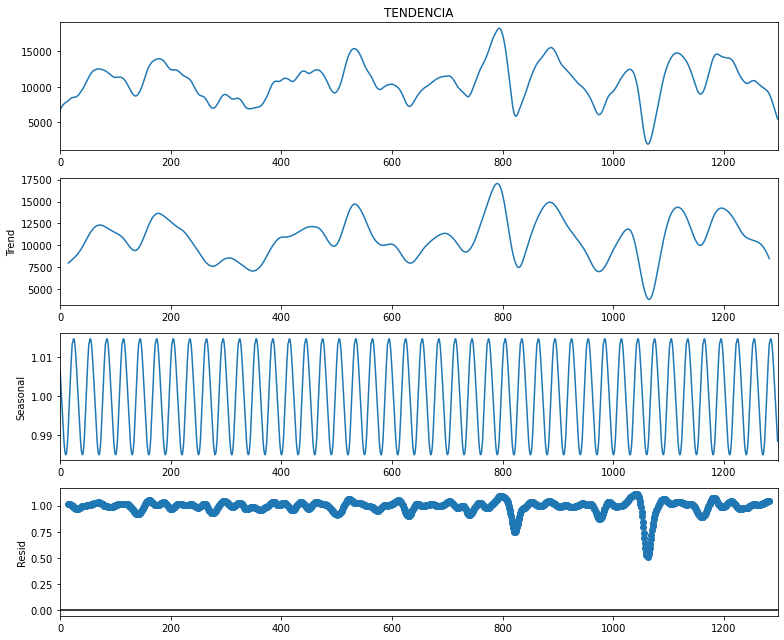

In [54]:
descomposicion = sm.tsa.seasonal_decompose(data_serie_tiempo['TENDENCIA'],
                                                  model='multiplicative', freq=30)  
fig = descomposicion.plot()
